In [1]:
import warnings
import random
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.cm import get_cmap
from matplotlib.colors import Normalize
from IPython.display import display, clear_output
warnings.filterwarnings('ignore')
plt.style.use("seaborn-poster")
plt.rcParams['text.usetex'] = True
#plt.rcParams["figure.figsize"] = (20,18)

regression fit

In [2]:
def fit(x,y):
    n = len(x)
    sx = sum(x)
    sy = sum(y)
    sx2 = sum(x*x)
    sxy = sum(x*y)
    b = (n*sx2 - sx**2)
    m = (n*sxy - sx*sy) / b
    c = (sy*sx2 - sx*sxy) / b
    return m,c

# Cantor Set

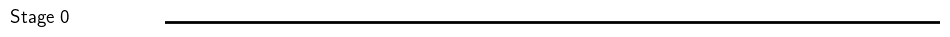

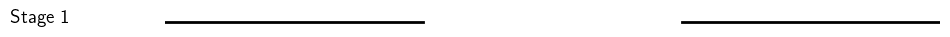

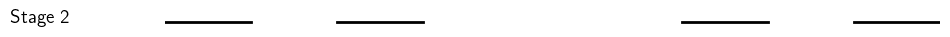

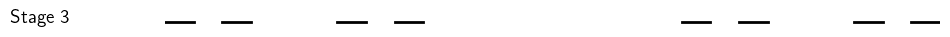

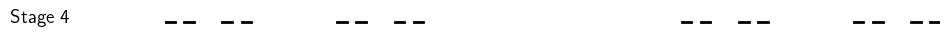

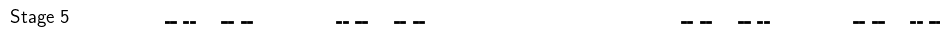

In [80]:
def generate_cantor_set(start, end, stage):
    if stage == 0:
        return [(start, end)]
    
    subinterval_length = (end - start) / 3
    left_end = start + subinterval_length
    right_start = end - subinterval_length
    segments = generate_cantor_set(start, left_end, stage - 1)
    segments += generate_cantor_set(right_start, end, stage - 1)
    return segments

def plot_cantor_set(segments, stage):
    plt.figure(figsize=(10, 0.12))    
    for segment in segments:
        plt.plot(segment, [0, 0], 'k', lw=2)
    
    plt.text(-0.2, -0.005, 'Stage {}'.format(stage), fontsize=14)
    plt.xlim(0, 1)
    plt.ylim(-0.1, 0.1)
    plt.axis('off')
    plt.show()

start   = 0
end     = 1
stages  = 5  # Set the number of stages

for stage in range(stages + 1):
    segments = generate_cantor_set(start, end, stage)  # Generate the Cantor set
    plot_cantor_set(segments, stage)                    # Plot the Cantor set

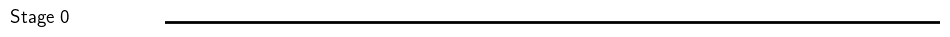

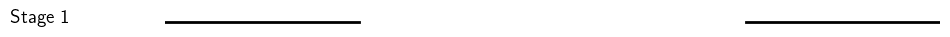

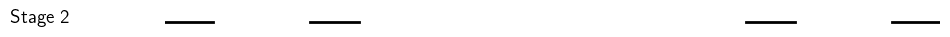

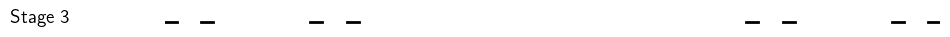

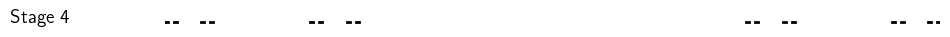

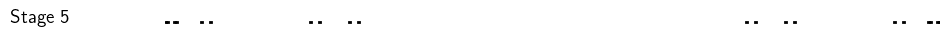

In [79]:
def generate_cantor_set(start, end, stage):
    if stage == 0:
        return [(start, end)]
    
    subinterval_length = (end - start) / 4
    left_end = start + subinterval_length
    right_start = end - subinterval_length
    segments = generate_cantor_set(start, left_end, stage - 1)
    segments += generate_cantor_set(right_start, end, stage - 1)
    return segments

def plot_cantor_set(segments, stage):
    plt.figure(figsize=(10, 0.12))    
    for segment in segments:
        plt.plot(segment, [0, 0], 'k', lw=2)
    
    plt.text(-0.2, -0.005, 'Stage {}'.format(stage), fontsize=14)
    plt.xlim(0, 1)
    plt.ylim(-0.1, 0.1)
    plt.axis('off')
    plt.show()

start   = 0
end     = 1
stages  = 5  # Set the number of stages

for stage in range(stages + 1):
    segments = generate_cantor_set(start, end, stage)  # Generate the Cantor set
    plot_cantor_set(segments, stage)                    # Plot the Cantor set

<span style="color:red">(A lopsided fractal) Divide the closed unit interval [ 0,1 ] into four quarters.                                                 
Delete the open second quarter from the left. This produces a set $S_1$.                                                       
Repeat this construction indefinitely; i.e., generate $S_{n+1}$ from $S_n$ by deleting the second quarter of each of the intervals in $S_n$.                                                                                                                  
a) Sketch the sets $S_1, . . . ,S_4$.                                                                                        
b) Compute the box dimension of the limiting set $S_\infty$.                                                                   
c) Is $S_\infty$ self-similar?

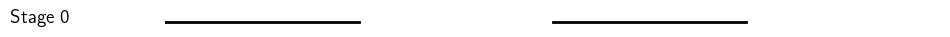

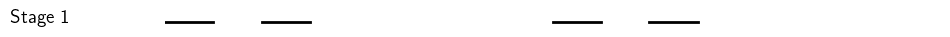

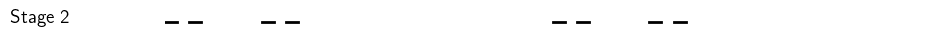

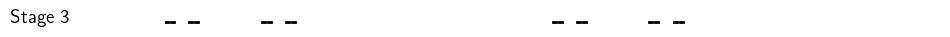

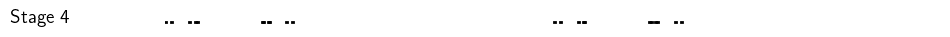

In [77]:
def generate_sets(start, end, n):
    sets = []
    current_set = [[start, end]]   
    
    for i in range(n+1):
        new_set = []
        for interval in current_set:
            start, end = interval
            length = end - start
            # Divide the interval into four parts and remove the second quarter
            quarter = length / 4
            new_set.append([start, start + quarter])
            new_set.append([start + 2 * quarter, start + 3 * quarter])
        sets.append(new_set)
        current_set = new_set
    
    return current_set


start   = 0
end     = 1
stages  = 4  # Set the number of stages

for stage in range(stages + 1):
    segments = generate_sets(start, end, stage)  # Generate the Cantor set
    plot_cantor_set(segments, stage)                    # Plot the Cantor set

### b)

The **box dimension** $d$ (also known as the **capacity dimension**) can be determined using the scaling relation:

$ \qquad N(\epsilon) \sim \epsilon^{-d}$

Where $N(\epsilon)$ is the number of intervals needed to cover the fractal set, and $\epsilon$ is the size of the intervals.

At each step:
- The number of remaining intervals doubles, i.e., $N(\epsilon) = 2^n$ at stage $n$.
- The length of each remaining interval decreases by a factor of $\frac{3}{4}$ at each stage, since we remove the second quarter (leaving 3/4 of each interval).

The number of intervals $N(\epsilon)$ grows as $2^n$ and the length of each interval $\epsilon$ shrinks as $ \left( \frac{3}{4} \right)^n $.

From the scaling relation:

$\qquad 2^n \sim \left(\frac{3}{4}\right)^{nd}$

Taking the logarithm of both sides:

$\qquad n \log 2 \sim n d \log \left( \frac{3}{4} \right)$

Solving for $d $:

$\qquad d = \frac{\log 2}{\log \left( \frac{4}{3} \right)}$

Thus, the box dimension $d$ of the limiting set $ S_\infty$ is:

$\qquad d \approx \frac{\log 2}{\log 4 - \log 3} \approx 0.792$

### c) 

The set $S_\infty$ is **not self-similar** in the strict sense.                                                            
In a self-similar fractal, the parts of the set at different scales are exact scaled copies of each other.               
However, in this construction, the intervals removed are not identical to each other at different stages.

Instead, the set is **self-affine**. This means that the set has different scaling factors along different directions        
(in this case, the intervals are not identical at each stage, but they follow a specific affine scaling).

Thus, $S_\infty $ is **self-affine**, not strictly self-similar.


<span style="color:red"> Show that the middle-thirds Cantor set contains no intervals. But also
show that no point in the set is isolated.

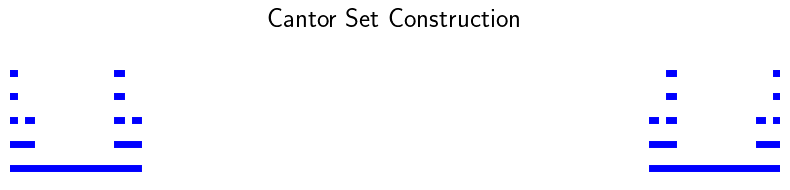

In [81]:
def cantor_set_plot(iterations):
    fig, ax = plt.subplots(figsize=(8, 2))
    
    # Initial interval
    remaining_intervals = [(0, 1)]
    
    for i in range(iterations):
        new_intervals = []
        for start, end in remaining_intervals:
            # Remove the middle third of each interval
            mid = (start + end) / 2
            new_intervals.append((start, mid - (end - start) / 3))
            new_intervals.append((mid + (end - start) / 3, end))
        
        remaining_intervals = new_intervals
        
        # Plot the remaining intervals at the current step
        for start, end in remaining_intervals:
            ax.plot([start, end], [i, i], color='blue', lw=5)
    
    ax.set_title("Cantor Set Construction")
    ax.set_ylim(-0.5, iterations + 0.5)
    ax.set_xlim(0, 1)
    ax.axis('off')
    plt.tight_layout()
    plt.show()

# Plot Cantor set for 5 iterations
cantor_set_plot(5)


# Lévy Fractal

In [13]:
def Lévy_Fractal(points, angle, level, length):
    
    if level == 0:
        end_x = points[-1][0] + length * np.cos(angle)
        end_y = points[-1][1] + length * np.sin(angle)
        points.append((end_x, end_y))
    else:
        sub_length = length / np.sqrt(2)
        new_angle = angle + np.pi / 4
        Lévy_Fractal(points, new_angle, level - 1, sub_length)
        new_angle = angle - np.pi / 4
        Lévy_Fractal(points, new_angle, level - 1, sub_length)

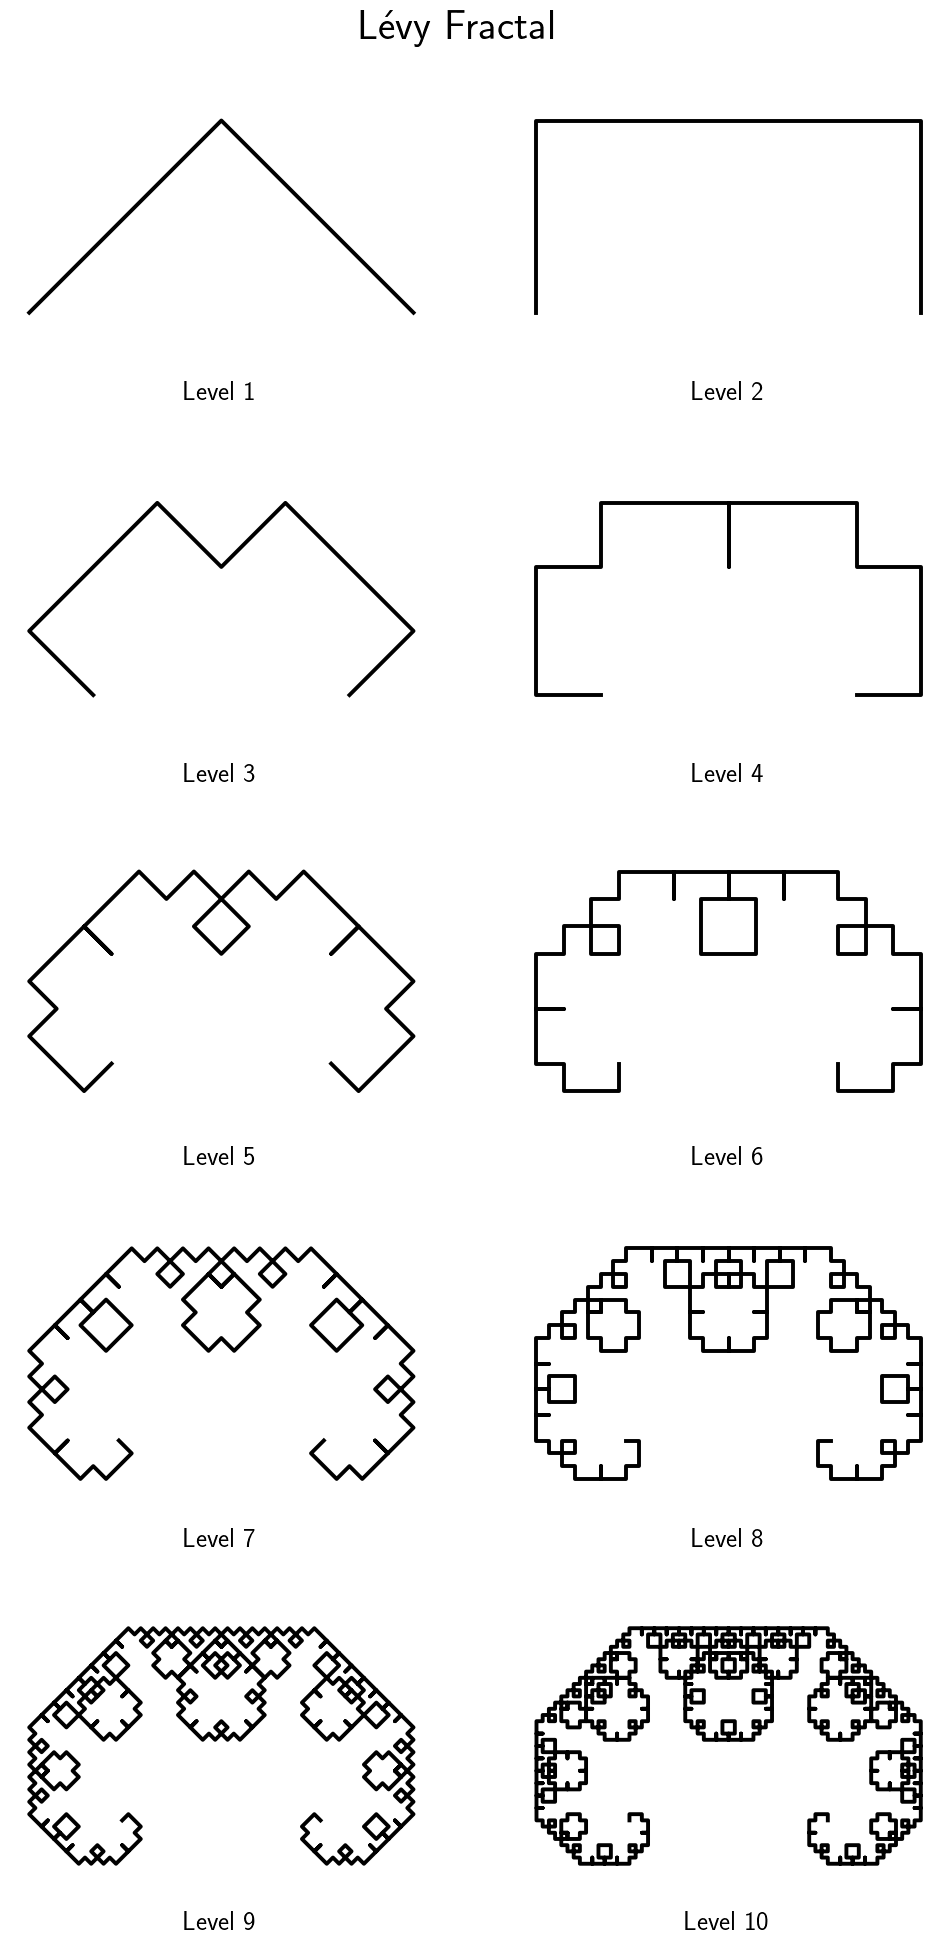

In [14]:
# Set the initial parameters
start_x, start_y = 0, 0
angle = 0
levels = 10
length = 1
fig=plt.figure(figsize=(12, 24))
fig.suptitle("Lévy Fractal",fontsize=30,y=0.9)
for level in range(1,levels+1):
    # Generate the points of the Lévy fractal
    points = [(start_x, start_y)]
    Lévy_Fractal(points, angle, level, length)

    # Extract x and y coordinates from the points
    x_coords = [point[0] for point in points]
    y_coords = [point[1] for point in points]

    # Plot the Lévy fractal
    plt.subplot(5,2,level)
    plt.plot(x_coords, y_coords, 'k')
    plt.axis('equal')
    plt.axis('off')
    plt.title("Level {}".format(level),y=-0.1)
plt.show()

# Pascal's Triangle

In [32]:
row=8
import math
for i in range(0,row):
    for j in range(row-i+1):
        print('  ',end=' ')
    for k in range(0, i+1):
        c=math.factorial(i)//(math.factorial(k)*math.factorial(i-k))
        if c%2==0:
            print(' ','*',' ',end=' ')
        else:
            # first value in a line is always 1
            print(' ', c,' ',end=' ')
        #print(c, end=' ')
    print()

                             1   
                          1     1   
                       1     *     1   
                    1     3     3     1   
                 1     *     *     *     1   
              1     5     *     *     5     1   
           1     *     15     *     15     *     1   
        1     7     21     35     35     21     7     1   


# $$\textbf{Dot Methods}$$

In [33]:
row=16
import math
for i in range(0,row):
    for j in range(row-i+1):
        print('  ',end=' ')
    for k in range(0, i+1):
        c=math.factorial(i)//(math.factorial(k)*math.factorial(i-k))
        if c%2==0:
            print(' ',' ',' ',end=' ')
        else:
            # first value in a line is always 1
            print(' ','.',' ',end=' ')
        #print(c, end=' ')
    print()

                                                     .   
                                                  .     .   
                                               .           .   
                                            .     .     .     .   
                                         .                       .   
                                      .     .                 .     .   
                                   .           .           .           .   
                                .     .     .     .     .     .     .     .   
                             .                                               .   
                          .     .                                         .     .   
                       .           .                                   .           .   
                    .     .     .     .                             .     .     .     .   
                 .                       .                       .                       .   
            

## Barnsley's Fern Fractal

<span style="color:red">$\begin{equation*}(x,y)_{n+1} = \left\{\begin{array}{rl} (0.5, 0.27y_n), & r < 0.02,\\
                                                (−0.139x_n + 0.263y_n + 0.57, \\
                                       0.246x_n + 0.224y_n − 0.036), & 0.02 \le r \le 0.17,\\
                                        (0.17x_n − 0.215y_n + 0.408, \\
                                       0.222x_n + 0.176y_n + 0.0893), & 0.17 < r \le 0.3,\\
                                         (0.781x_n + 0.034y_n + 0.1075,\\
                                      −0.032x_n + 0.739y_n + 0.27), & 0.3 < r < 1.\end{array} \right.\end{equation*}$

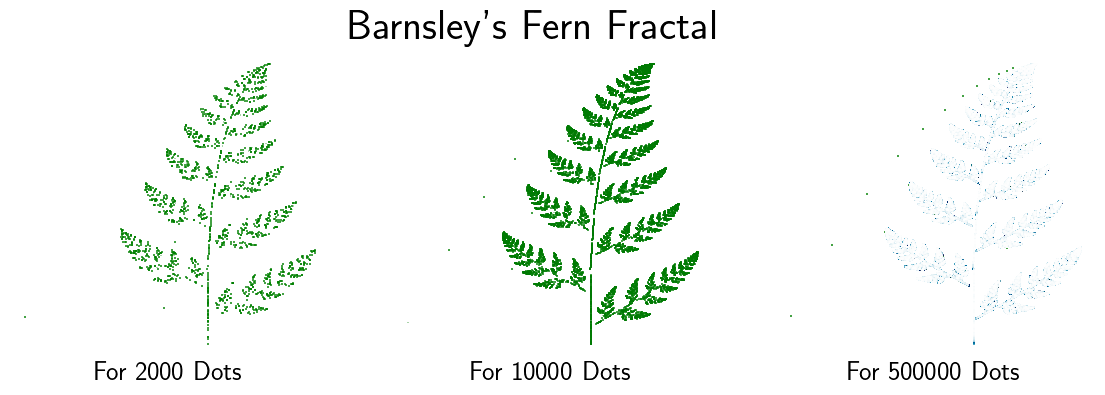

In [106]:
def barnsley_fern(n_points,x=0.1,y=0.1):
    points = [(x, y)]
    for _ in range(n_points):
        r = np.random.random()
        if r < 0.02:
            x, y = 0.5, 0.27 * y
        elif 0.02 <= r < 0.17:
            x, y = (-0.139 * x + 0.263 * y + 0.57, 0.246 * x + 0.224 * y - 0.036)
        elif 0.17 <= r < 0.3:
            x, y = (0.17 * x - 0.215 * y + 0.408, 0.222 * x + 0.176 * y + 0.0893)
        else:
            x, y = (0.781 * x + 0.034 * y + 0.1075, -0.032 * x + 0.739 * y + 0.27)
        points.append((x, y))
    return points

N=[2000, 10000, 500000]
fig=plt.figure(figsize=(14,4))
fig.suptitle(r"Barnsley's Fern Fractal",fontsize=30)
cmap = get_cmap('ocean')
norm = Normalize(vmin=0, vmax=max(N))

for i in range(len(N)):
    plt.subplot(1, 3, i + 1)
    fern_points = barnsley_fern(N[i])
    x_values = [point[0] for point in fern_points]
    y_values = [point[1] for point in fern_points]
    colors = cmap(norm(np.arange(len(x_values))))  # Map colors using colormap
    plt.scatter(x_values, y_values, c=colors, s=0.5, marker=',')  # Apply colors
    plt.title(f'For {N[i]} Dots', y=-0.1)
    plt.xlabel("X")
    plt.ylabel("Y")
    plt.axis("off")

plt.show()

# Self-Affin Tree

<span style="color:red">$\begin{equation*}(x,y)_{n+1} = \left\{\begin{array}{rl} (0.05x_n, 0.6y_n), & 10\% , \\
(0.05x_n, \\ −0.5y_n + 1.0),& 10\% ,\\
(0.46x_n − 0.15y_n,\\ 0.39x_n + 0.38y_n + 0.6), & 20\% ,\\
(0.47x_n − 0.15y_n,\\ 0.17x_n + 0.42y_n + 1.1), & 20\% ,\\
(0.43x_n + 0.28y_n,\\ −0.25x_n + 0.45y_n + 1.0), & 20\% ,\\
(0.42x_n + 0.26y_n,\\ −0.35x_n + 0.31y_n + 0.7), & 20\% .\end{array} \right.\end{equation*}$

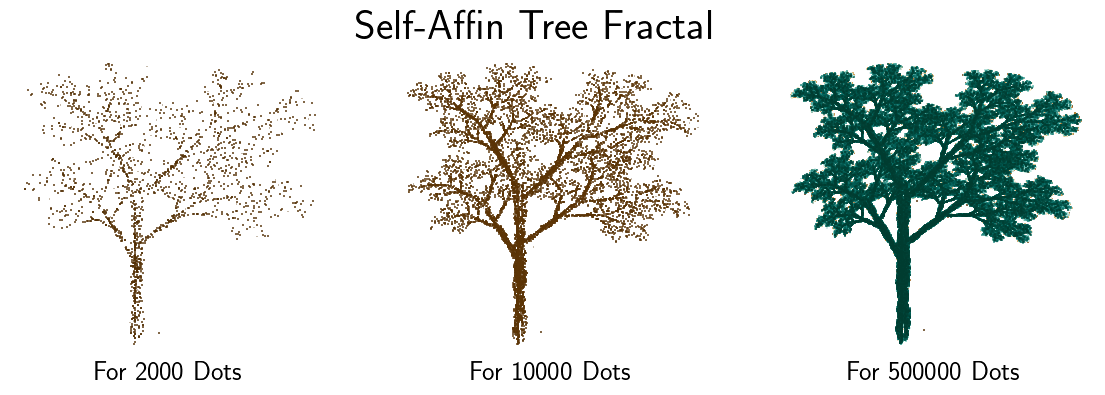

In [107]:
def Trees(n_points,x=0.1,y=0.1):
    points = [(x, y)]

    for _ in range(n_points):
        r = np.random.random()

        if r < 0.10:
            x, y = 0.05 * x, 0.6 * y
        elif 0.10 <= r < 0.20:
            x, y = 0.05 * x, -0.5 * y + 1.0
        elif 0.20 <= r < 0.40:
            x, y = 0.46 * x - 0.15 * y, 0.39 * x + 0.38 * y + 0.6
        elif 0.40 <= r < 0.60:
            x, y = 0.47 * x - 0.15 * y, 0.17 * x + 0.42 * y + 1.1
        elif 0.60 <= r < 0.80:
            x, y = 0.43 * x + 0.28 * y, -0.25 * x + 0.45 * y + 1.0
        else:
            x, y = 0.42 * x + 0.26 * y, -0.35 * x + 0.31 * y + 0.7
        points.append((x, y))
    return points

N=[2000, 10000, 500000]
fig=plt.figure(figsize=(14,4))
fig.suptitle(r"Self-Affin Tree Fractal",fontsize=30)
cmap = get_cmap('BrBG')
norm = Normalize(vmin=0, vmax=max(N))

for i in range(len(N)):
    plt.subplot(1,3,i+1)
    fern_points = Trees(N[i])
    x_values = [point[0] for point in fern_points]
    y_values = [point[1] for point in fern_points]
    colors = cmap(norm(np.arange(len(x_values))))  # Map colors using colormap
    plt.scatter(x_values, y_values, c=colors, s=0.5, marker=',')  # Apply colors
    plt.title(f'For {N[i]} Dots', y=-0.1)
    plt.xlabel("X")
    plt.ylabel("Y")
    plt.axis("off")
plt.show()

In [14]:
def plot_coords(coords, bare_plot=False):
    plt.figure(figsize=(4,4))
    if bare_plot:
        plt.axis('off')        # Turns off the axis markers.
    plt.axes().set_aspect('equal', 'datalim')    # Ensures equal aspect ratio.
    X, Y = zip(*coords)    # Converts a list of coordinates into  lists of X and Y values, respectively.
    plt.plot(X, Y,'g,')
    plt.grid('off')
    plt.axis('equal')
    plt.axis('off')

def print_coords(coords):
    for (x, y) in coords:
        if isnan(x):
            print('<gap>')
        else:
            print('({:.2f}, {:.2f})'.format(x, y))

def transform_sequence(sequence, transformations):
    return ''.join(transformations.get(c, c) for c in sequence)

DEGREES_TO_RADIANS = np.pi / 180

def transform_multiple(sequence, transformations, iterations):
    for _ in range(iterations):
        sequence = transform_sequence(sequence, transformations)
    return sequence

def branching_turtle_to_coords(turtle_program, turn_amount=45):
    saved_states = list()
    state = (0, 0, 90)
    yield (0, 0)

    for command in turtle_program:
        x, y, angle = state

        if command.lower() in 'abcdefghij':        # Move forward (matches a-j and A-J)
            state = (x - np.cos(angle * DEGREES_TO_RADIANS),
                     y + np.sin(angle * DEGREES_TO_RADIANS),
                     angle)
            
            if command.islower():                  # Add a break in the line if command matches a-j
                yield (float('nan'), float('nan'))

            yield (state[0], state[1])

        elif command == '+':                       # Turn clockwise
            state = (x, y, angle + turn_amount)

        elif command == '-':                       # Turn counterclockwise
            state = (x, y, angle - turn_amount)

        elif command == '[':                       # Remember current state
            saved_states.append(state)

        elif command == ']':                       # Return to previous state
            state = saved_states.pop()
            yield (float('nan'), float('nan'))
            x, y, _ = state
            yield (x, y)

def l_plot(axiom, transformations, iterations=0, angle=45):
    turtle_program = transform_multiple(axiom, transformations, iterations)
    coords = branching_turtle_to_coords(turtle_program, angle)
    plot_coords(coords, bare_plot=True)         

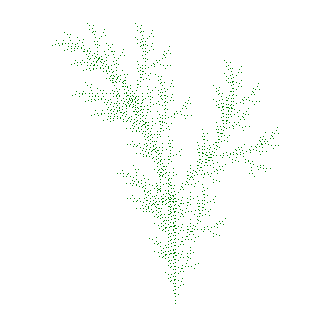

In [15]:
l_plot('F', {'F': 'FF[++F][-FF]'}, 5, 22)

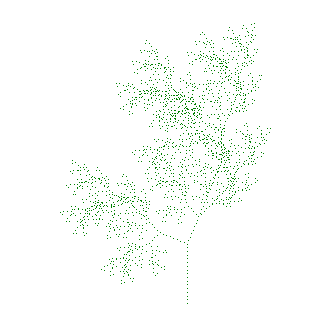

In [16]:
l_plot('A', {'F': 'FF', 'A': 'F[+AF-[A]--A][---A]'}, 5, 22.5)

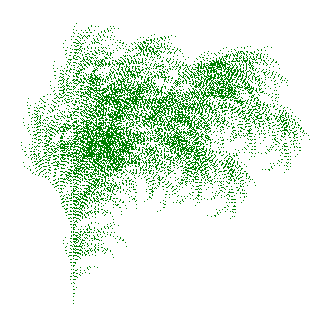

In [17]:
l_plot('X', {'F': 'FX[FX[+XF]]', 'X': 'FF[+XF++X-F[+ZX]][-X++F-X]', 'Z':'[+F-X-F][++ZXo]'}, 5, 20)

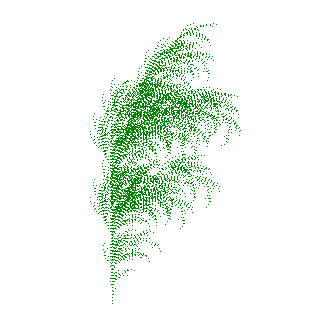

In [18]:
l_plot('F', {'F': 'FX[FX[+XF]]', 'X': 'FF[+XF++X-F[+ZX]][-X++F-X]', 'Z':'[+F-X-F][++ZXo]'}, 5, 20)

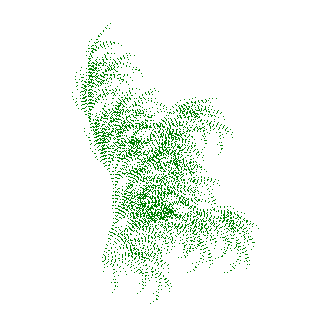

In [19]:
l_plot('Z', {'F': 'FX[FX[+XF]]', 'X': 'FF[+XF++X-F[+ZX]][-X++F-X]', 'Z':'[+F-X-F][++ZXo]'}, 5, 20)

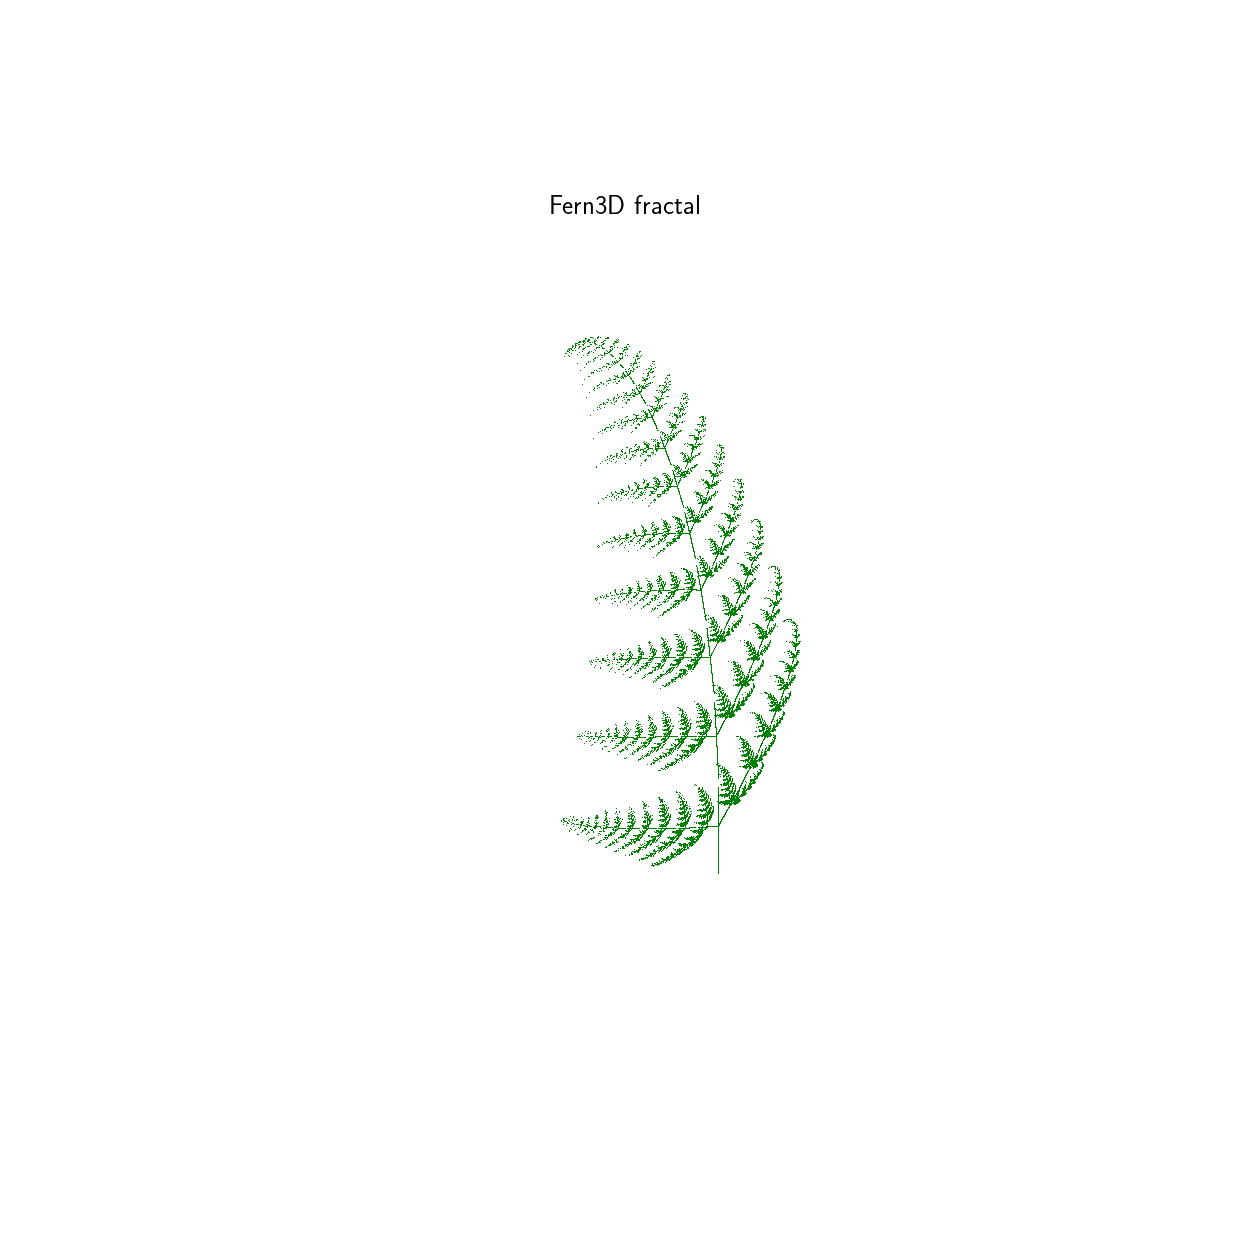

In [20]:
def barnsley_fern3D(n_points):
    x = 0.5
    y = 0.0
    z = -0.2
    xn = 0.0
    yn = 0.0
    x_values,y_values,z_values = [],[],[]

    for _ in range(n_points):
        r = np.random.random()
        if r <= 0.1:
            xn = 0.0
            yn = 0.18 * y
            zn = 0.0
        elif 0.1 < r <= 0.7:
            xn = 0.85 * x
            yn = 0.85 * y + 0.1 * z + 1.6
            zn = -0.1 * y + 0.85 * z
        elif 0.7 < r <= 0.85:
            xn = 0.2 * x - 0.2 * y
            yn = 0.2 * x + 0.2 * y + 0.8
            zn = 0.3 * z
        else:
            xn = -0.2 * x + 0.2 * y
            yn = 0.2 * x + 0.2 * y + 0.8
            zn = 0.3 * z
        x = xn
        y = yn
        z = zn
        xc = 4.0 * x
        yc = 2.0 * y - 7
        zc = z
        x_values.append(xc)
        y_values.append(yc)
        z_values.append(zc)
    return ([x_values,y_values,z_values])
    
x,y,z=barnsley_fern3D(50000)
fig = plt.figure(figsize = (16,16))
ax = plt.axes(projection="3d")
ax.grid('off')
ax.plot3D(z,x,y,'g,')
plt.title("Fern3D fractal",y=0.9)
plt.xlabel("X")
plt.ylabel("Y")
plt.axis('equal')
plt.axis('off')
plt.show()

# The Sierpiński Gasket                                                                                                        
<span style="color:red">To generate our first fractal, we play a game of chance in which we place dots at points picked randomly within a triangle (Bunde and Havlin, 1991).                                                                                                        
Here are the rules (which you should try out in the margins now).                                                                   
1. Draw an equilateral triangle with vertices and coordinates:                                                                    
vertex 1: $(a_1 , b_1)$; vertex 2: $(a_2 , b_2)$; vertex 3: $(a_3 , b_3)$ .                                                                    
2. Place a dot at an arbitrary point $P = (x_0 , y_0)$ within this triangle.                                                        
3. Find the next point by selecting randomly the integer 1, 2, or 3:                                                               
a) If 1, place a dot halfway between P and vertex 1.                                                                          
b) If 2, place a dot halfway between P and vertex 2.                                                                          
c) If 3, place a dot halfway between P and vertex 3.                                                                            
4. Repeat the process using the last dot as the new P.                                                                                
Mathematically, the coordinates of successive points are given by the formulas                                                   
$\displaystyle(x_{k+1}, y_{k+1}) = \frac{(x_k , y_k) + (a_n , b_n)}{2} , n = \text{integer }(1 + 3r_i ) $ where $r_i$ is a random number between 0 and 1                                                                                                
and where the integer function outputs the closest integer smaller than or equal to the argument.

In [21]:
def Sierpiński(num_points):
    a1, b1 = 0, 0
    a2, b2 = 2, 0
    a3, b3 = 1, np.sqrt(3)
    x0, y0 = 1, 1
    x_points = [x0]
    y_points = [y0]

    for _ in range(num_points):
        r = np.random.random() # Random number between 0 and 1
        n = int(1 + 3 * r) # Randomly select 1, 2, or 3
        # Calculate the new point coordinates
        if n == 1:
            an = (a1 - x_points[-1]) / 2
            bn = (b1 - y_points[-1]) / 2
        elif n == 2:
            an = (a2 - x_points[-1]) / 2
            bn = (b2 - y_points[-1]) / 2
        else:
            an = (a3 - x_points[-1]) / 2
            bn = (b3 - y_points[-1]) / 2
        x_new = x_points[-1] + an
        y_new = y_points[-1] + bn
        x_points.append(x_new)
        y_points.append(y_new)
    return ([x_points, y_points])

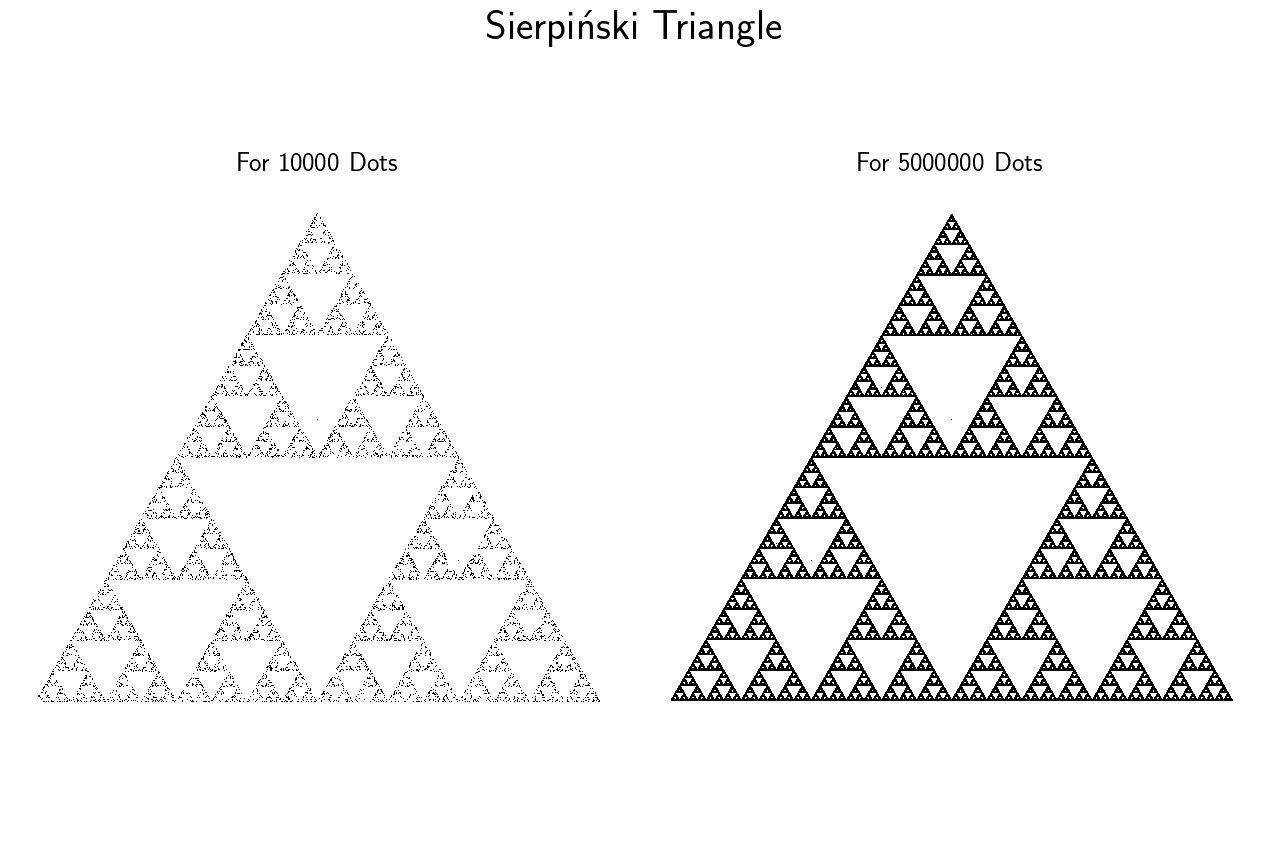

In [41]:
N=[10000, 5000000]
fig=plt.figure()
fig.suptitle("Sierpiński Triangle",fontsize=30)
for i in range(len(N)):
    plt.subplot(1,2,1+i)
    x, y = Sierpiński(N[i])
    plt.plot(x, y, 'k,')
    plt.xlabel('x')
    plt.ylabel('y')
    plt.axis('equal')
    plt.axis('off')
    plt.tight_layout()
    plt.title('For {} Dots '.format(N[i]),y=0.85)
plt.show()

<span style="color:red">Here are the rules (which you should try out in the margins now).                                                                   
1. Draw an equilateral triangle with vertices and coordinates:                                                                    
vertex 1: (a1 , b1); vertex2:(a2 , b2); vertex3:(a3 , b3); vertex 4: (a4 , b4); vertex5:(a5 , b5); vertex6:(a6 , b6); vertex7:(a7 , b7); vertex8:(a8 , b8)                                                                                                             
2. Place a dot at an arbitrary point P = (x0 , y0) within this triangle.                                                        
3. Find the next point by selecting randomly the integer 1, 2, or 3:                                                               
a) If 1, place a dot halfway between P and vertex 1.                                                                          
b) If 2, place a dot halfway between P and vertex 2.                                                                          
c) If 3, place a dot halfway between P and vertex 3.                                                                                   
d) If 4, place a dot halfway between P and vertex 4.                                                                          
e) If 5, place a dot halfway between P and vertex 5.                                                                          
f) If 6, place a dot halfway between P and vertex 6.                                                                                  
g) If 7, place a dot halfway between P and vertex 7.                                                                          
h) If 8, place a dot halfway between P and vertex 8.                                                                                   
4. Repeat the process using the last dot as the new P.                                                                                
Mathematically, the coordinates of successive points are given by the formulas                                                   
$\qquad\qquad\displaystyle(x_{k+1}, y_{k+1}) = \frac{(x_k , y_k) + (a_n , b_n)}{3} , n = \text{integer }(1 + 8r_i ) $        
where $r_i$ is a random number between 0 and 1 and where the integer function outputs the closest integer smaller than or equal to the argument.

In [23]:
def Sierpiński_Square(num_points):
    a1, b1 = -2,-2
    a2, b2 = -2, 2
    a3, b3 =  2,-2
    a4, b4 =  2, 2
    a5, b5 = -2, 0
    a6, b6 =  0,-2
    a7, b7 =  0, 2
    a8, b8 =  2, 0
    x0, y0 =  0, 0
    x_points = [x0]
    y_points = [x0]

    for _ in range(num_points):
        ri = np.random.random() # Random number between 0 and 1
        n = int(1 + 8 * ri) 
        
        if n == 1:
            an = (a1 - 2*x_points[-1]) / 3
            bn = (b1 - 2*y_points[-1]) / 3
        elif n == 2:
            an = (a2 - 2*x_points[-1]) / 3
            bn = (b2 - 2*y_points[-1]) / 3
        elif n == 3:
            an = (a3 - 2*x_points[-1]) / 3
            bn = (b3 - 2*y_points[-1]) / 3
        elif n == 4:
            an = (a4 - 2*x_points[-1]) / 3
            bn = (b4 - 2*y_points[-1]) / 3
        elif n == 5:
            an = (a5 - 2*x_points[-1]) / 3
            bn = (b5 - 2*y_points[-1]) / 3
        elif n == 6:
            an = (a6 - 2*x_points[-1]) / 3
            bn = (b6 - 2*y_points[-1]) / 3
        elif n == 7:
            an = (a7 - 2*x_points[-1]) / 3
            bn = (b7 - 2*y_points[-1]) / 3
        else:
            an = (a8 - 2*x_points[-1]) / 3
            bn = (b8 - 2*y_points[-1]) / 3

        x_new = x_points[-1] + an
        y_new = y_points[-1] + bn

        x_points.append(x_new)
        y_points.append(y_new)
    return ([x_points, y_points])

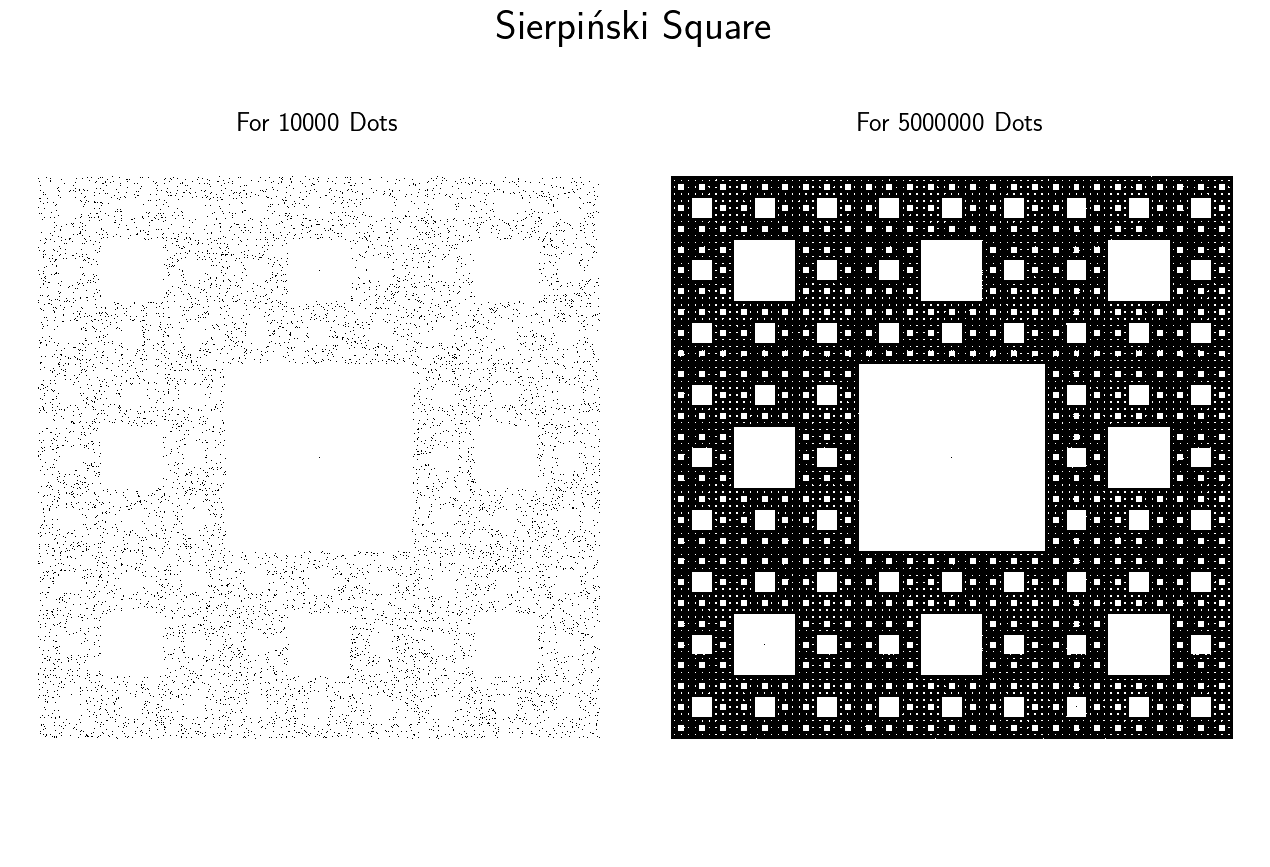

In [24]:
N=[10000, 5000000]
fig=plt.figure()
fig.suptitle("Sierpiński Square",fontsize=30)
for i in range(len(N)):
    plt.subplot(1,2,1+i)
    x, y = Sierpiński_Square(N[i])
    plt.plot(x, y, 'k,')
    plt.xlabel('x')
    plt.ylabel('y')
    plt.axis('equal')
    plt.axis('off')
    plt.tight_layout()
    plt.title('For {} Dots '.format(N[i]),y=0.9)
plt.show()

# $$\textbf{Box Method}$$

Sierpinski Triangle

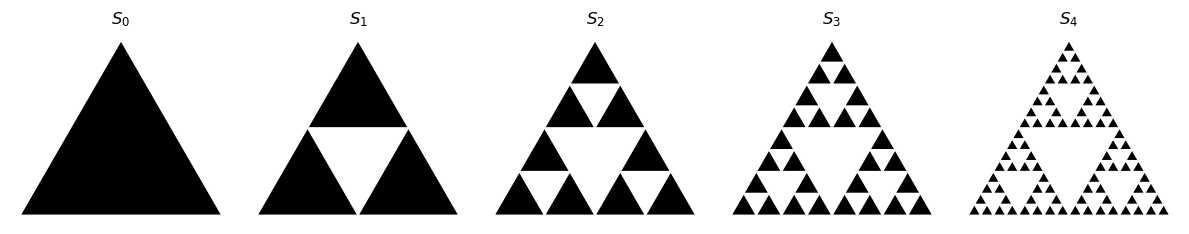

In [35]:
def draw_sierpinski_triangle(ax, x, y, size, depth):
    if depth == 0:
        ax.fill([ x, x + size, x + size / 2 ], [ y, y, y + size * (3**0.5) / 2 ], color="black", edgecolor="white")
    else:
        new_size = size / 2
        draw_sierpinski_triangle(ax, x, y, new_size, depth - 1)                                  # Bottom left  triangle
        draw_sierpinski_triangle(ax, x + new_size, y, new_size, depth - 1)                       # Bottom right triangle
        draw_sierpinski_triangle(ax, x + new_size / 2, y + new_size * (3**0.5) / 2, new_size, depth - 1)  # Top triangle

fig, ax = plt.subplots(1, 5, figsize=(12, 4))
ax = ax.flatten()

for i in range(5):
    ax[i].set_title(f'$S_{i}$')
    ax[i].set_aspect("equal")
    ax[i].axis("off")  # Turn off the axes for a clean look
    draw_sierpinski_triangle(ax[i], 0, 0, 1, i)  # Starting with base triangle at (0, 0)
plt.tight_layout()
plt.show()

Sierpinski Pyramid

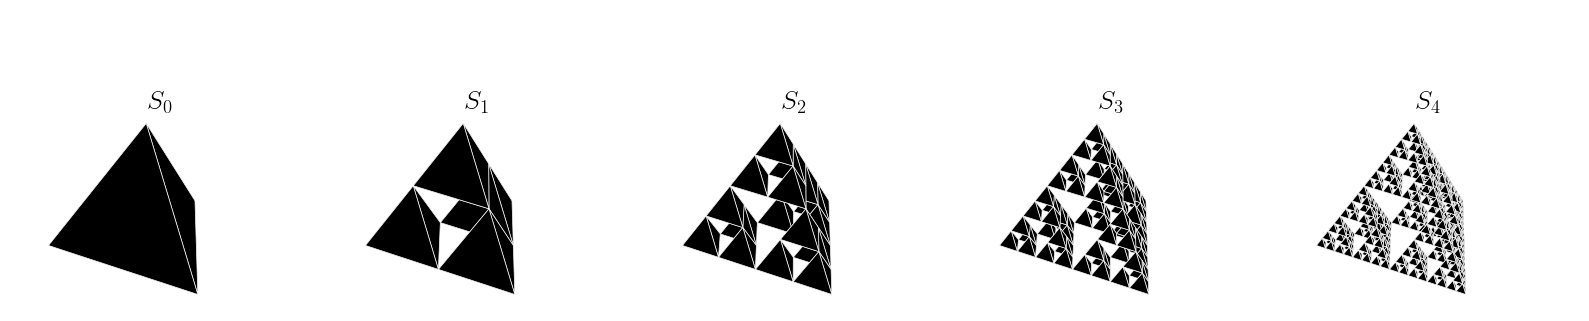

In [41]:
from mpl_toolkits.mplot3d.art3d import Poly3DCollection

def draw_tetrahedron(ax, vertices):
    faces = [ [vertices[0], vertices[1], vertices[2]],
              [vertices[0], vertices[1], vertices[3]],
              [vertices[0], vertices[2], vertices[3]],
              [vertices[1], vertices[2], vertices[3]] ]
    ax.add_collection3d(Poly3DCollection(faces, facecolors="black", linewidths=0.5, edgecolors="white"))

def draw_sierpinski_pyramid(ax, vertices, depth):
    if depth == 0:
        draw_tetrahedron(ax, vertices)
    else:        # Calculate midpoints of each edge of the tetrahedron
        mid_01 = (vertices[0] + vertices[1]) / 2
        mid_02 = (vertices[0] + vertices[2]) / 2
        mid_03 = (vertices[0] + vertices[3]) / 2
        mid_12 = (vertices[1] + vertices[2]) / 2
        mid_13 = (vertices[1] + vertices[3]) / 2
        mid_23 = (vertices[2] + vertices[3]) / 2        
        draw_sierpinski_pyramid(ax, [vertices[0], mid_01, mid_02, mid_03], depth - 1)
        draw_sierpinski_pyramid(ax, [mid_01, vertices[1], mid_12, mid_13], depth - 1)
        draw_sierpinski_pyramid(ax, [mid_02, mid_12, vertices[2], mid_23], depth - 1)
        draw_sierpinski_pyramid(ax, [mid_03, mid_13, mid_23, vertices[3]], depth - 1)

vertices = np.array([ [0, 0, 0],                             # Vertex 1
                      [1, 0, 0],                             # Vertex 2
                      [0.5, np.sqrt(3) / 2, 0],              # Vertex 3
                      [0.5, np.sqrt(3) / 6, np.sqrt(6) / 3]  # Vertex 4
                    ])


fig = plt.figure(figsize=(16,10))
for i in range(1, 5+1):
    ax = fig.add_subplot(1, 5, i, projection='3d')
    draw_sierpinski_pyramid(ax, vertices, depth=i-1)

    ax.set_title(f"$S_{{{i-1}}}$", y=0.7)
    ax.set_box_aspect([1, 1, 1]) 
    ax.axis("off")
    #draw_menger_sponge(ax, 0, 0, 0, 1, i-1)
plt.tight_layout()
plt.show()

<span style="color:red">(Sierpinski carpet) Consider the process shown in Figure 1.                                                               
The closed unit box is divided into nine equal boxes, and the open central box is deleted.
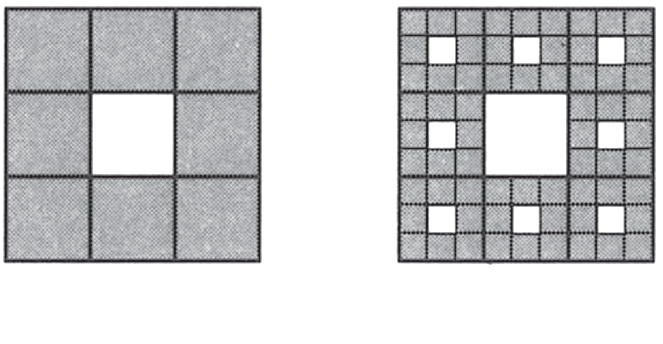
Then this process is repeated for each of the eight remaining sub-boxes, and so on. Figure 1 shows the first two stages.          
a) Sketch the next stage $S_3$.                                                                                              
b) Find the similarity dimension of the limiting fractal, known as the Sierpinski carpet.                                            
c) Show that the Sierpinski carpet has zero area.

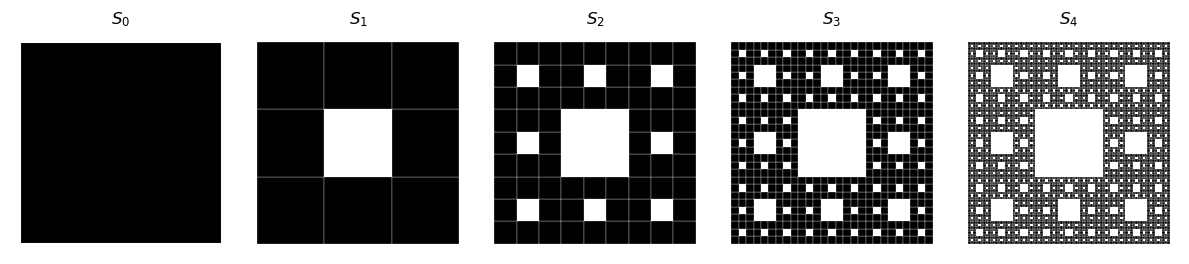

In [21]:
def draw_sierpinski_carpet(ax, x, y, size, depth, current_depth=0):
    if depth == 0:
        square_x = [x, x + size, x + size, x]
        square_y = [y, y, y + size, y + size]
        ax.fill(square_x, square_y, color="black", edgecolor="white", linewidth=1.5)
    else:
        new_size = size / 3
        for i in range(3):
            for j in range(3):
                if i == 1 and j == 1:  # Skip the central square
                    continue
                if current_depth == depth - 1:
                    color = f"C{current_depth % 10}"  # Cycle through 10 colors
                    square_x = [x + i * new_size, x + (i + 1) * new_size, x + (i + 1) * new_size, x + i * new_size]
                    square_y = [y + j * new_size, y + j * new_size, y + (j + 1) * new_size, y + (j + 1) * new_size]
                    ax.fill(square_x, square_y, color="black", edgecolor="white", linewidth=0.2)
                else:
                     draw_sierpinski_carpet(ax, x + i * new_size, y + j * new_size, new_size, depth, current_depth + 1)

fig, ax = plt.subplots(1, 5, figsize=(12, 4))
ax = ax.flatten()
for i in range(5):
    ax[i].set_title(f'$S_{{{i}}}$')
    ax[i].set_aspect("equal")
    ax[i].axis("off")
    draw_sierpinski_carpet(ax[i], 0, 0, 1, i )  
plt.tight_layout()
plt.show()

### (b) 

The **similarity dimension** $D_s$ of a fractal is given by:  

$D_s = \frac{\log(N)}{\log(r)}$
  
where:
- $N$ is the number of self-similar pieces.
- $r$ is the scaling factor (the side length ratio of a smaller piece to the original square).

#### Step 1: Scaling Factor  
Each stage divides the square into $3 \times 3 = 9$ equal parts, so the side length of each part is scaled by a factor $r = \frac{1}{3}$.

#### Step 2: Number of Remaining Squares  
In each stage, $8$ squares remain ($1$ square is removed from $9$).  

#### Step 3: Dimension Calculation  

$D_s = \frac{\log(8)}{\log(3)} \approx 1.8928$

In [5]:
N = 8  # Number of remaining pieces
S = 3  # Scaling factor
D = np.log(N) / np.log(S)
print(f"Similarity Dimension of the Sierpinski Carpet: {D:.4f}")

Similarity Dimension of the Sierpinski Carpet: 1.8928


### (c)

To find the total area of the Sierpinski Carpet as the process continues indefinitely:

1. **Initial Area $A_0$:**  
   Start with a unit square of area $1$

2. **Stage $S_1$:**  
   Remove the central square of area $\frac{1}{9}$, leaving $A_1 = 1 - \frac{1}{9} = \frac{8}{9}$.

3. **Stage $S_2$:**  
   Remove the central squares from each of the remaining $8$ squares. The area removed is:
   
   $\text{Removed Area} = 8 \times \frac{1}{9^2} = \frac{8}{81}$.
     
   Remaining area:
   
   $A_2 = \frac{8}{9} - \frac{8}{81} = \frac{64}{81}.$

4. **Stage $S_n$:**  
   At each stage, the remaining $8^n$ squares have side length $\left(\frac{1}{3}\right)^n$, so the area removed is:
   
   $\text{Removed Area} = 8^n \times \left(\frac{1}{3}\right)^{2n}$.
   
   The remaining area after $n$ stages:
   
   $A_n = 1 - \sum_{k=1}^{n} \frac{8^k}{9^k}$.

5. **Infinite Sum:**  
   As $n \to \infty$, the sum of the removed areas becomes:
   
   $\sum_{k=1}^{\infty} \frac{8^k}{9^k} = \sum_{k=1}^{\infty} \left(\frac{8}{9}\right)^k = \frac{\frac{8}{9}}{1 - \frac{8}{9}} = 1$
   
   Thus, the remaining area:
   
   $A_\infty = 1 - 1 = 0$


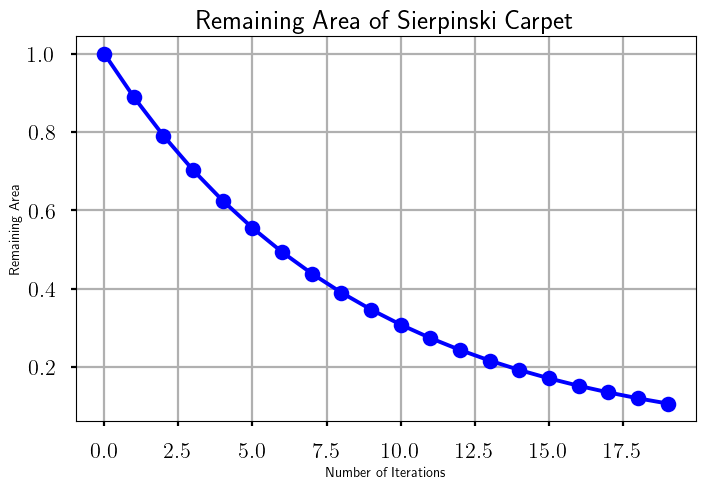

Remaining area after 20 iterations: 0.1066846836


In [28]:
iterations = 20
initial_area = 1.0   # Initialize the total area (normalized to 1)
remaining_area = []
for n in range(iterations):
    area = initial_area * (8/9)**n
    remaining_area.append(area)

plt.figure(figsize=(8, 5))
plt.plot(range(iterations), remaining_area, marker='o', linestyle='-', color='blue')
plt.xlabel('Number of Iterations')
plt.ylabel('Remaining Area')
plt.title('Remaining Area of Sierpinski Carpet')
plt.grid()
plt.show()

print(f"Remaining area after {iterations} iterations: {remaining_area[-1]:.10f}")

<span style="color:red">(Menger Sponges)                                                                                                                 
Generalize the previous exercise to three dimensions—start with a solid cube, and divide it into 27 equal sub-cubes.        
Delete the central cube on each face, along with the central cube.                                                            
    (If you prefer, you could imagine drilling three mutually orthogonal square holes through the centers of the faces.)    
Infinite iteration of this process yields a fractal called the Menger sponge. Find its similarity dimension.                
Repeat for the Menger hypersponge in N dimensions, if you dare.

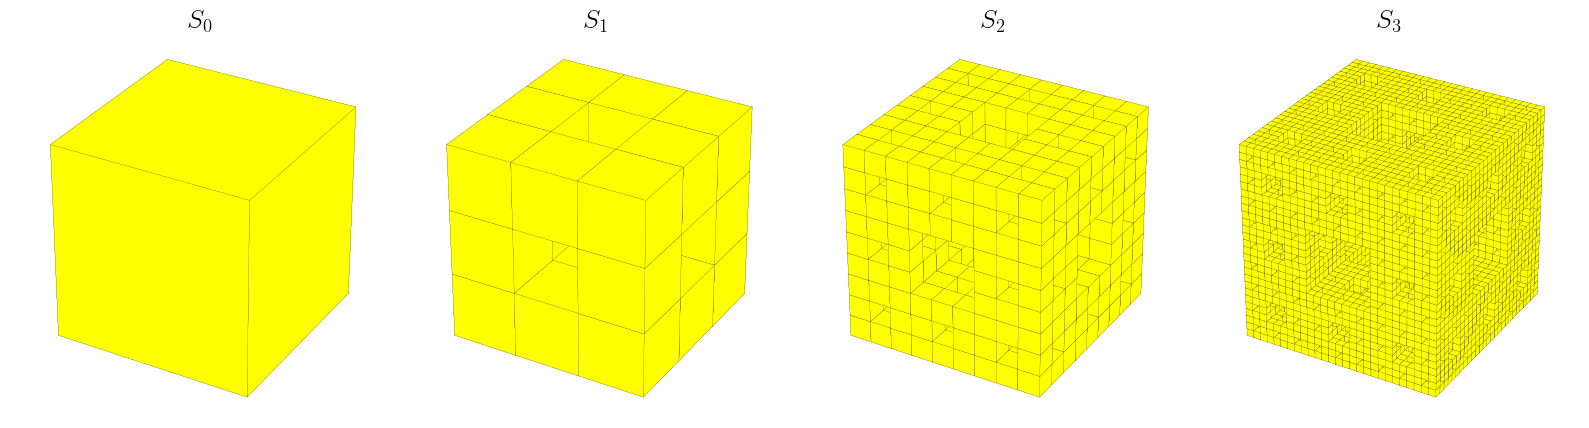

In [13]:
from mpl_toolkits.mplot3d.art3d import Poly3DCollection

def draw_menger_sponge(ax, x, y, z, size, depth, current_depth=0):
    if depth == 0:
        vertices = [ [x, y, z],
                     [x + size, y, z],
                     [x + size, y + size, z],
                     [x, y + size, z],
                     [x, y, z + size],
                     [x + size, y, z + size],
                     [x + size, y + size, z + size],
                     [x, y + size, z + size], ]
        faces = [ [vertices[j] for j in [0, 1, 2, 3]],  # Bottom face
                  [vertices[j] for j in [4, 5, 6, 7]],  # Top face
                  [vertices[j] for j in [0, 1, 5, 4]],  # Front face
                  [vertices[j] for j in [2, 3, 7, 6]],  # Back face
                  [vertices[j] for j in [0, 3, 7, 4]],  # Left face
                  [vertices[j] for j in [1, 2, 6, 5]],  # Right face
                 ]
        if current_depth == depth - 1:
            color = f"C{current_depth % 10}"  # Cycle through 10 colors
        ax.add_collection3d(Poly3DCollection(faces, facecolors='yellow', edgecolors="black", linewidths=0.1))
    else:
        new_size = size / 3
        for i in range(3):
            for j in range(3):
                for k in range(3):
                    if (i == 1 and j == 1) or (i == 1 and k == 1) or (j == 1 and k == 1):
                        continue
                    draw_menger_sponge(ax, x + i * new_size, y + j * new_size, z + k * new_size, new_size, depth - 1)

fig = plt.figure(figsize=(16, 6))
for i in range(1, 5):
    ax = fig.add_subplot(1, 4, i, projection='3d')
    ax.set_title(f"$S_{{{i-1}}}$")
    ax.set_box_aspect([1, 1, 1]) 
    ax.axis("off")
    draw_menger_sponge(ax, 0, 0, 0, 1, i-1)
plt.tight_layout()
plt.show()

In [18]:
def box_dimension_menger(N, remove_faces=True):
    total_subcubes = 3**N                                # Total subdivisions in N dimensions: 3^N    
    removed_cubes = 2 * N + 1 if remove_faces else 1     # Central and axis-center cubes   
    remaining_cubes = total_subcubes - removed_cubes     # Remaining subcubes 
    box_dimension = np.log(remaining_cubes) / np.log(3)  # Compute box dimension
    return box_dimension

print("Box dimension of 3D Menger sponge:", box_dimension_menger(3))
print("Box dimension of 4D Menger hypersponge:", box_dimension_menger(4))
print("Box dimension of 5D Menger hypersponge:", box_dimension_menger(5))

Box dimension of 3D Menger sponge: 2.7268330278608417
Box dimension of 4D Menger hypersponge: 3.892789260714372
Box dimension of 5D Menger hypersponge: 4.957834012825034


## Koch Curve

In [8]:
def Koch_curve(k):
    n_lines = 4**k
    h = 3**(-k);
    x = [0]*(n_lines+1)
    y = [0]*(n_lines+1)
    x[0], y[0] = 0, 0
    segment=[0] * n_lines
    angle=[0, np.pi/3, -np.pi/3, 0]           # The angles of the four segments.
    for i in range(n_lines):
        m=i
        ang=0
        for j in range(k):
            segment[j] = np.mod(m, 4)
            m = np.floor(m / 4)
            ang = ang + angle[int(segment[j])]
        x[i+1] = x[i] + h*np.cos(ang)
        y[i+1] = y[i] + h*np.sin(ang)
    return x,y

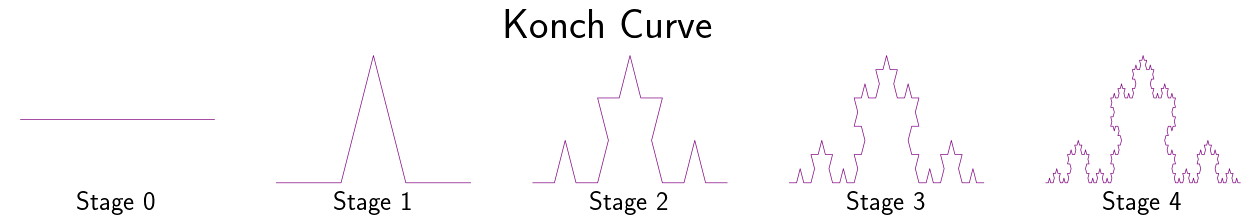

In [9]:
fig=plt.figure(figsize=(16,4))
fig.suptitle('Konch Curve',fontsize=30)
for k in range(5):
    x,y=Koch_curve(k)
    plt.subplot(2,5,k+1)
    plt.plot(x, y,'purple',linewidth=0.5)
    plt.title('Stage {}'.format(k),y=-0.2)
    #plt.axis('equal')
    plt.axis('off')
plt.show()

In [10]:
def inverted_Koch_curve(k):
    n_lines = 4**k
    h = 3**(-k)
    x = [0]*(n_lines+1)
    y = [0]*(n_lines+1)
    x[0], y[0] = 0, 0
    segment = [0] * n_lines
    angle = [0, -np.pi/3, np.pi/3, 0]   # The inverted angles of the four segments.
    for i in range(n_lines):
        m = i
        ang = 0
        for j in range(k):
            segment[j] = np.mod(m, 4)
            m = np.floor(m / 4)
            ang = ang + angle[int(segment[j])]
        x[i+1] = x[i] + h*np.cos(ang)
        y[i+1] = y[i] + h*np.sin(ang)
    return x, y

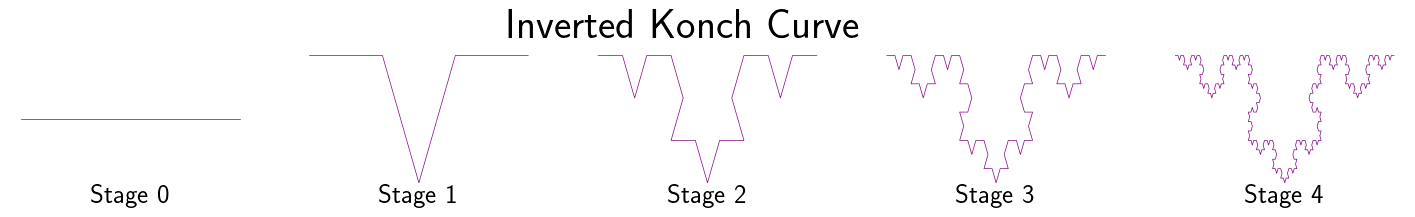

In [11]:
fig=plt.figure(figsize=(18,4))
fig.suptitle('Inverted Konch Curve',fontsize=30)
for k in range(5):
    x,y=inverted_Koch_curve(k)
    plt.subplot(2,5,k+1)
    plt.plot(x, y,'purple',linewidth=0.5)
    plt.title('Stage {}'.format(k),y=-0.15)
    #plt.axis('equal')
    plt.axis('off')
plt.show()

In [29]:
def koch_cantor_snowflake(order, scale=10):
    
    def _koch_snowflake_complex(order):
        if order == 0:
            # initial triangle
            angles = np.array([0, 120, 240]) + 90
            return scale / np.sqrt(3) * np.exp(np.deg2rad(angles) * 1j)
        else:
            ZR = 0.5 - 0.5j * np.sqrt(3) / 3
            
            p1 = _koch_snowflake_complex(order - 1)  # start points
            p2 = np.roll(p1, shift=-1)               # end points
            dp = p2 - p1                             # connection vectors

            new_points = np.empty(len(p1) * 4, dtype=np.complex128)
            new_points[::4] = p1
            new_points[1::4] = p1 + dp / 3
            new_points[2::4] = p1 + dp * ZR
            new_points[3::4] = p1 + dp / 3 * 2
            return new_points

    points = _koch_snowflake_complex(order)
    x, y = points.real, points.imag
    return x, y

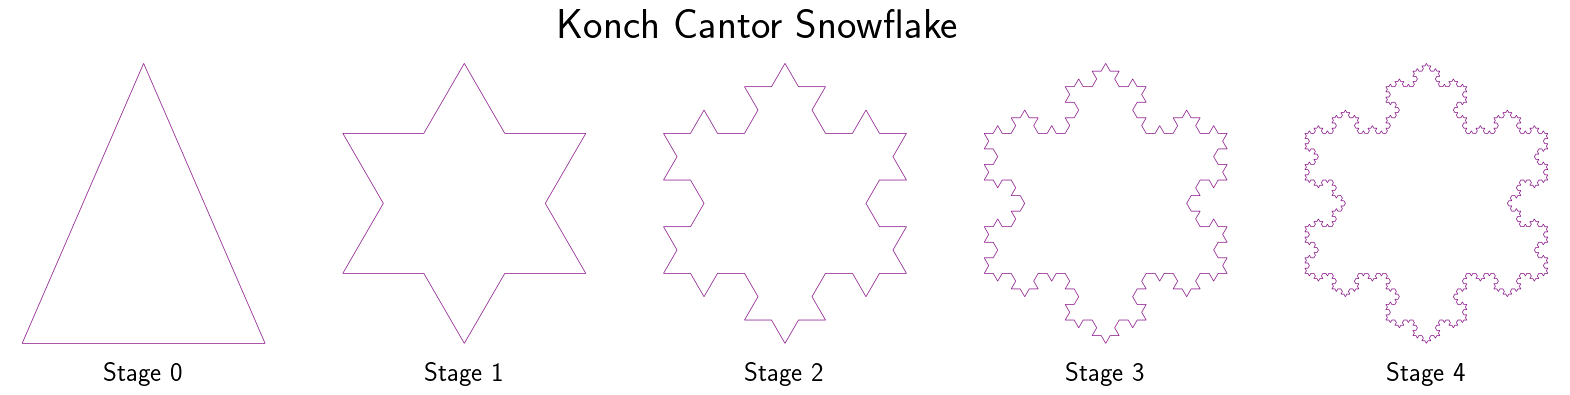

In [30]:
fig=plt.figure(figsize=(20,4))
fig.suptitle('Konch Cantor Snowflake',fontsize=30)
for i in range(5):
    plt.subplot(1,5,i+1)
    x, y = koch_cantor_snowflake(order=i)
    plt.fill(x, y, facecolor='none', edgecolor='purple')
    plt.axis('off')
    plt.title('Stage {}'.format(i),y=-0.1)
plt.show()

<span style="color:red">(Snowflake) To construct the famous fractal known as the von Koch snowflake curve, use an equilateral triangle for $S_0$.     
Then do the von Koch procedure  on each of the three sides.                                                                   
a) Show that $S_1$ looks like a star of David.                                                                                     
b) Draw $S_2$ and $S_3$.                                                                                                      
c) The snowflake is the limiting curve $S=S_\infty$. Show that it has infinite arc length.                                            
d) Find the area of the region enclosed by $S$.                                                                                      
e) Find the similarity dimension of $S$.                                                                                     
The snowflake curve is continuous but nowhere differentiable—loosely speaking, it is “all corners”!

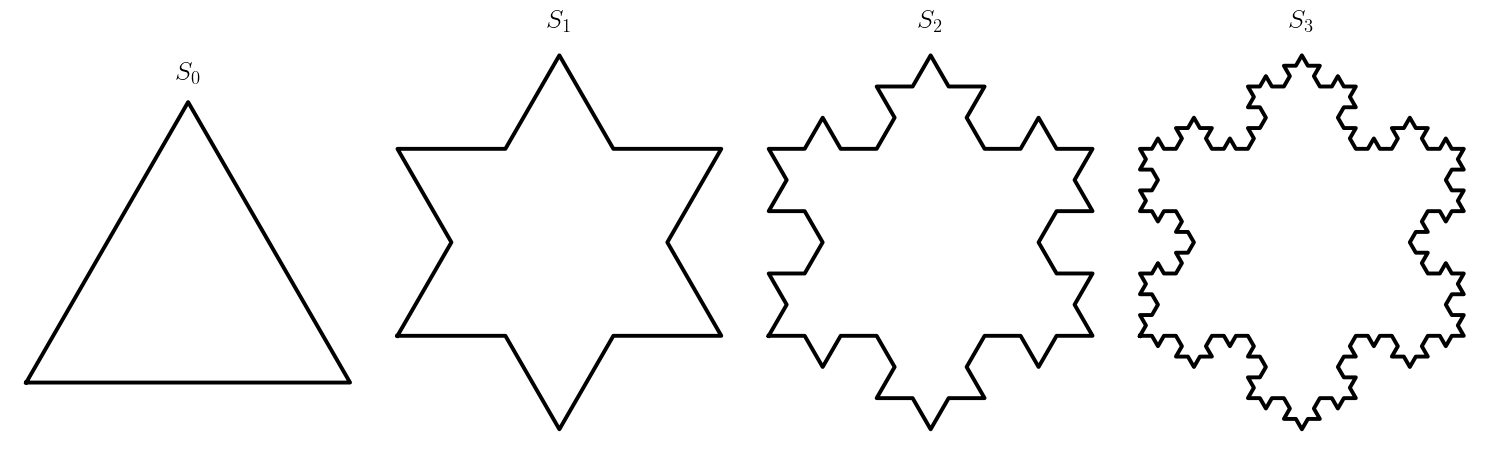

In [3]:
def koch_curve(start, end, iterations):
    
    if iterations == 0:
        return [start, end]
    
    x1, y1 = start
    x2, y2 = end
    dx, dy = x2 - x1, y2 - y1
    x3 = x1 + dx / 3
    y3 = y1 + dy / 3
    x4 = x1 + 2 * dx / 3
    y4 = y1 + 2 * dy / 3
    mx = (x1 + x2) / 2
    my = (y1 + y2) / 2
    x5 = (x3 + x4) / 2 + np.sqrt(3) * (y4 - y3) / 2
    y5 = (y3 + y4) / 2 - np.sqrt(3) * (x4 - x3) / 2

    return koch_curve(start, [x3, y3], iterations - 1) + \
           koch_curve([x3, y3], [x5, y5], iterations - 1) + \
           koch_curve([x5, y5], [x4, y4], iterations - 1) + \
           koch_curve([x4, y4], end, iterations - 1)

def koch_snowflake(iterations):
    points = koch_curve([0, 0], [1, 0], iterations)
    points += koch_curve([1, 0], [0.5, np.sqrt(3) / 2], iterations)
    points += koch_curve([0.5, np.sqrt(3) / 2], [0, 0], iterations)
    return np.array(points)

fig, axes = plt.subplots(1,4, figsize=(15, 5))
iterations_list = [0,1, 2, 3]  

for i, ax in enumerate(axes):
    iterations = iterations_list[i]
    snowflake = koch_snowflake(iterations)
    ax.plot(snowflake[:, 0], snowflake[:, 1], color="black")
    ax.set_title(f"$S_{iterations}$")
    ax.set_aspect("equal")
    ax.axis("off")  # Turn off the axes for a clean look
plt.tight_layout()
plt.show()

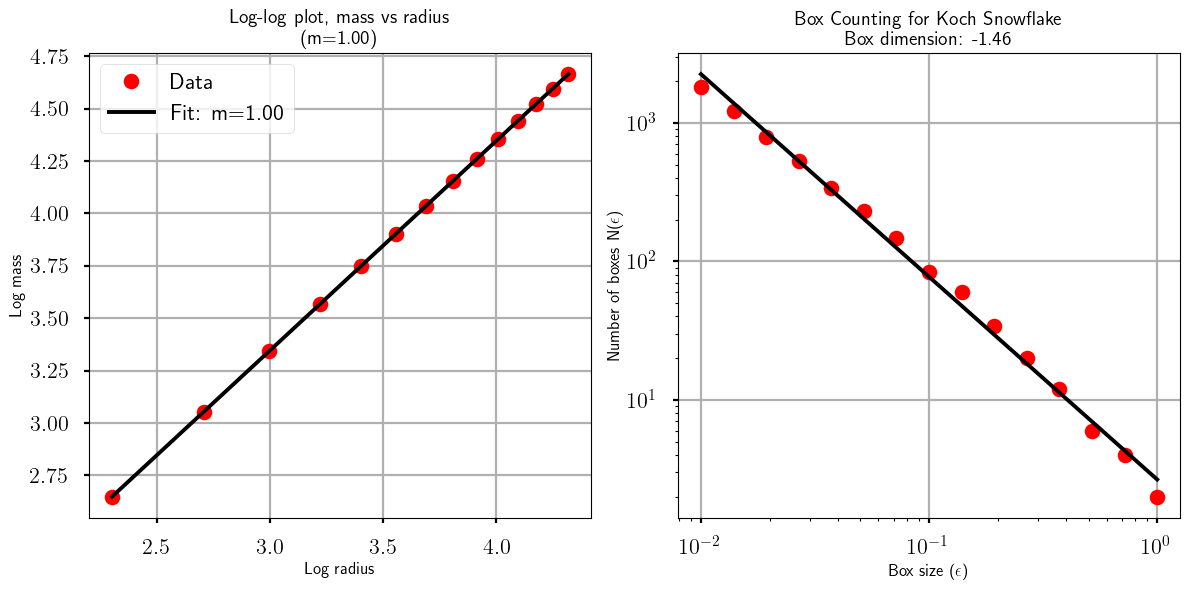

In [25]:
def box_count(points, box_sizes):
    counts = []
    for size in box_sizes:
        count = 0
        # Check how many boxes of size `size` are needed to cover the points
        for x in np.arange(min(points[:, 0]), max(points[:, 0]), size):
            for y in np.arange(min(points[:, 1]), max(points[:, 1]), size):
                box = [x, y]
                # Count boxes that contain at least one point
                if np.any(np.abs(points - box).max(axis=1) < size):
                    count += 1
        counts.append(count)
    return counts

radiusArray = np.arange(10, 80, 5)
mass = []

for i in radiusArray:
    massValue = i*2**0.5
    mass.append(massValue)

logRadius = np.log(radiusArray)
logMass   = np.log(mass)
m1, c1 = fit(logRadius, logMass)
Y1 = m1 * logRadius + c1

plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.plot(logRadius, logMass, 'ro', label="Data")
plt.plot(logRadius, Y1, 'k-', label=f"Fit: m={m1:.2f}")
plt.title(f"Log-log plot, mass vs radius\n (m={m1:.2f})", fontsize=14)
plt.xlabel("Log radius", fontsize=12)
plt.ylabel("Log mass", fontsize=12)
plt.grid(True)
plt.legend()

# Part 2: Koch Snowflake Box Counting Method

iterations = 5  # Koch curve iterations (higher value for more detail)
snowflake = koch_snowflake(iterations)
box_sizes = np.logspace(-2, 0, 15)
counts = box_count(snowflake, box_sizes)
m2, c2 = fit(np.log(box_sizes),np.log(counts))
Y2 = box_sizes**(m2)  * np.exp(c2)

plt.subplot(1, 2, 2)
plt.loglog(box_sizes, counts, 'ro')
plt.plot(box_sizes, Y2, 'k-', label=f"Fit: m={m2:.2f}")
plt.title(f"Box Counting for Koch Snowflake\n Box dimension: {m2:.2f}", fontsize=14)
plt.xlabel(r"Box size ($\epsilon$)", fontsize=12)
plt.ylabel(r"Number of boxes N($\epsilon$)", fontsize=12)
plt.grid(True)

plt.tight_layout()
plt.show()

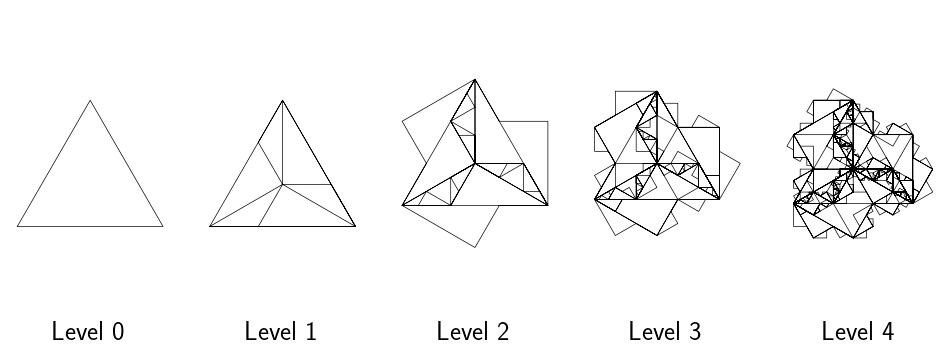

In [31]:
def koch_curve2(start, end, level):
    length = np.linalg.norm(end - start)
    angle = np.angle(end - start)

    if level == 0:
        return [start, end]
    else:
        segment_length = length / 3
        p1 = start
        p2 = start + segment_length * np.exp(1j * angle)
        p3 = p2 + segment_length * np.exp(1j * (angle + np.pi/3))
        p4 = end

        return (
                koch_curve2(p1, p2, level - 1) +
                koch_curve2(p2, p3, level - 1) +
                koch_curve2(p3, p4, level - 1) +
                koch_curve2(p4, p1, level - 1)
               )

def plot_koch_snowflake(level):
    base_triangle = np.array([0 + 0j,
                              1 + 0j,
                              0.5 + 0.5 * np.sqrt(3) * 1j,
                              0 + 0j])
    snowflake_points = []
    for i in range(3):
        start = base_triangle[i]
        end = base_triangle[i + 1]
        points = koch_curve2(start, end, level)
        snowflake_points.extend(points)
    return np.array(snowflake_points)    
    
fig=plt.figure(figsize=(12, 4))    

for i in range(5):
    snowflake_points=plot_koch_snowflake(i)
    plt.subplot(1,5,i+1)
    plt.plot(snowflake_points.real, snowflake_points.imag, 'k',linewidth=0.5)
    plt.axis('equal')
    plt.axis('off')
    plt.title('Level {}'.format(i),y=-0.1)
plt.show()

# Mystery Curve :                                                                                                                  
# $\qquad\qquad\displaystyle{f(t)=e^{it}\bigg[1−\frac{1}{2}e^{ikt}+\frac{i}{3}e^{−ikt}\bigg]}$

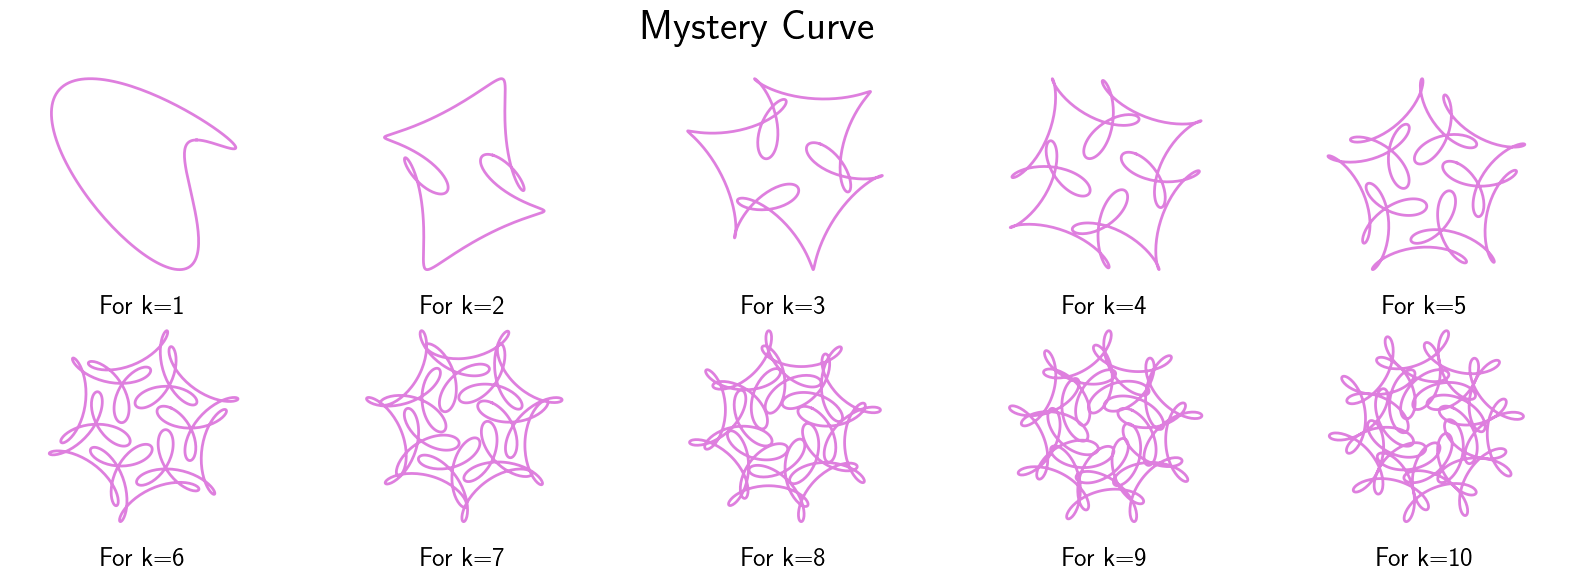

In [12]:
def f(t, k):
    def P(z):
        return 1 - z / 2 - 1 / z**3 / 3j
    return np.exp(1j*t) * P(np.exp(k*1j*t))

# k is supplied as a command line argument.
K = 10      

fig=plt.figure(figsize=(20,6))
fig.suptitle('Mystery Curve',fontsize=30)
for k in range(1,K+1):
    # Choose a grid of t values at a suitable resolution so that the curve is well-represented.
    t = np.linspace(0, 2*np.pi, 200*k+1);
    u = f(t, k)
    
    plt.subplot(2,5,k)
    plt.plot(np.real(u), np.imag(u), lw=2, color='m', alpha=0.5)
    plt.axis('equal')
    plt.title('For k={}'.format(k),y=-0.2)
    plt.axis('off')
plt.show()

# Diffusion-Limited Aggregation (DLA)

<span style="color:red">Diffusion-Limited Aggregation (DLA) is a process that models the growth of structures such as dendrites, colloids, or certain biological formations.                                                                                              
It relies on random walks of particles that aggregate when they come into contact with a stationary cluster.              
Below is a reformulation of the simulation problem and a set of questions to guide analysis and understanding.

The following steps outline the Diffusion-Limited Aggregation process using a 2D grid:

1. **Initialize the Lattice Grid**  
   - Create an empty 2D lattice `grid[size, size]`, initially set to zero.  

2. **Seed Placement**  
   - Place a stationary "seed" particle at the center of the grid, `grid[size//2, size//2] = 1`.

3. **Boundary Circle**  
   - Define a circular boundary around the seed particle with radius $R$. Particles will be released from random points on this circle.

4. **Random Walk**  
   - Start a particle at a random angle $\theta$ on the circle and let it perform a random walk:
     - **Movement Rules**:  
       a. The walker moves vertically or horizontally to neighboring lattice sites.  
       b. A uniform random number $r$ determines the direction:  
         - If $r < 0.5,$ the walker moves vertically.  
         - If $r \geq 0.5,$ the walker moves horizontally.
     - **Stick Condition**:  
       - If the particle encounters a neighboring occupied site, it sticks to the cluster and stops moving.  
     - **Loss Condition**:  
       - If the particle leaves the predefined circle, it is lost and discarded.

5. **Iterative Process**  
   - Repeat the random walk process for a large number of particles to grow the cluster.

6. **Visualization**  
   - Optionally, visualize the cluster growth periodically to observe its fractal-like structure.

7. **Relation Between Size and Mass**  
   Deduce the relationship between the size $R$ of the aggregate and its mass $M$ (the total number of particles in the cluster).  
   - **Simulation Steps**:  
     i. Release particles one by one from the boundary.  
     ii. Record the number of particles that aggregate (cluster mass $M$).  
     iii. Measure the maximum radius $R$ of the cluster.  
   - **Analysis**:  
     - Plot $\log(M) \ vs. \ \log(R) $ to check for a power-law relationship, $( M \propto R^D ),$ where $D$ is the fractal dimension.  
     - Determine whether the growth exhibits fractal characteristics based on $D$.

8. **Fractal Behavior**  
   Does the simulated cluster exhibit fractal properties?  
   - Evaluate whether the aggregate's perimeter grows faster than its area, indicating a non-uniform, fractal structure.  
   - Calculate the fractal dimension $D$ using the relationship $( M \propto R^D )$. Compare $D$ to known fractal dimensions of DLA clusters $( D \sim 1.7 )$.

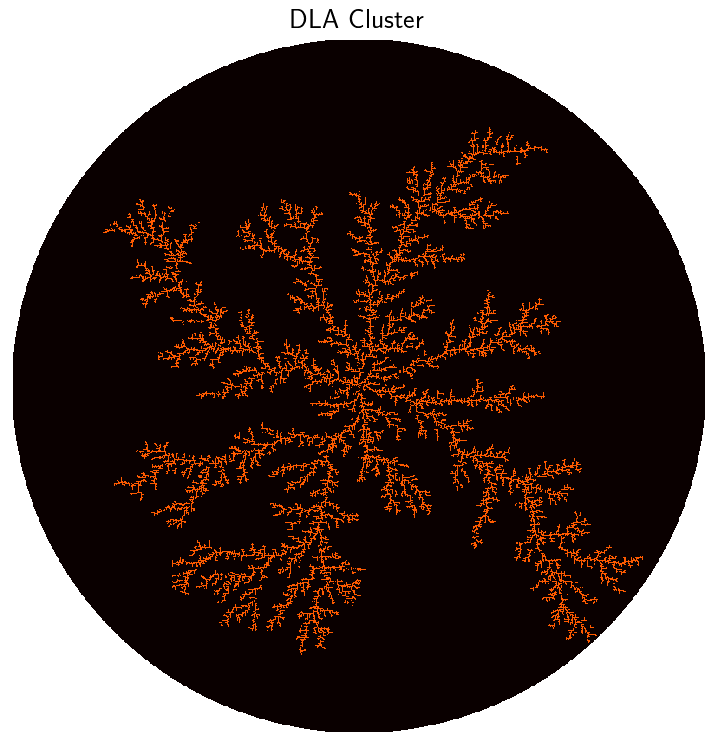

Random walkers in the cluster:  30965
Random walkers in the cluster:  55
Random walkers in the cluster:  106
Random walkers in the cluster:  188
Random walkers in the cluster:  306
Random walkers in the cluster:  289
Random walkers in the cluster:  417
Random walkers in the cluster:  444
Random walkers in the cluster:  726
Random walkers in the cluster:  865
Random walkers in the cluster:  1138
Random walkers in the cluster:  1200
Random walkers in the cluster:  1031
Random walkers in the cluster:  1424
Random walkers in the cluster:  1769


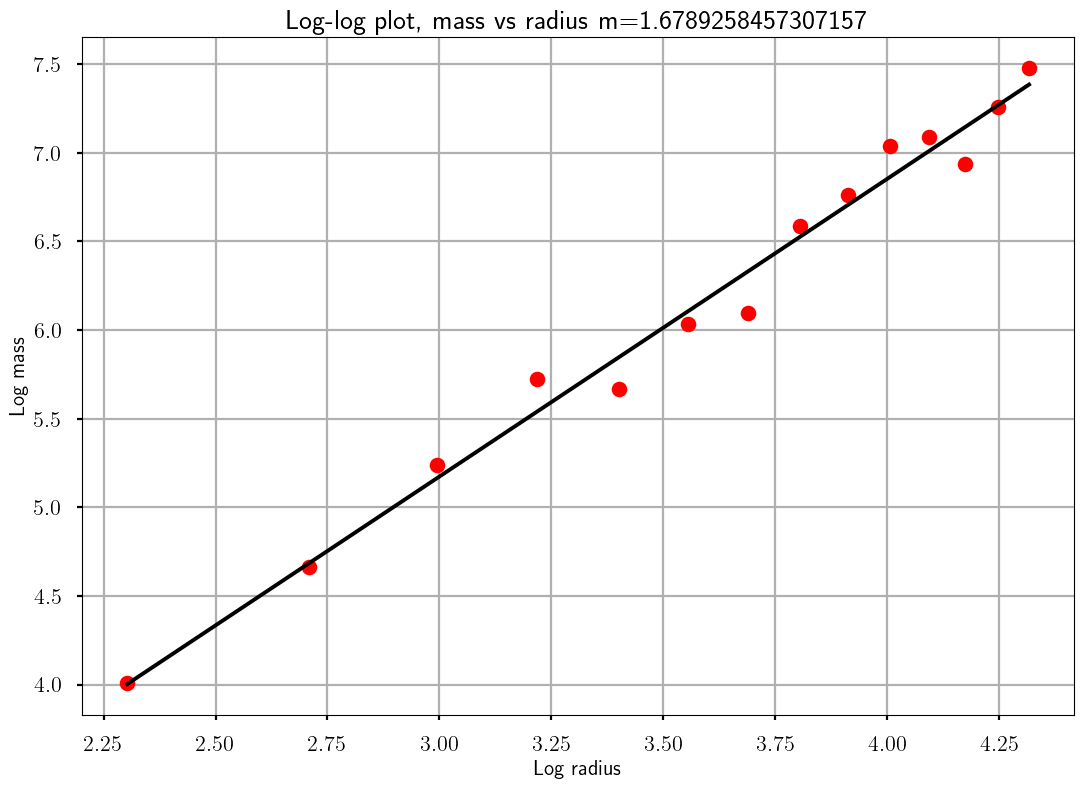

In [89]:
def randomAtRadius(radius, seedX, seedY):
    theta = 2*np.pi*random.random()         #generate random theta
    x=int(radius*np.cos(theta))+seedX       #use trig to transfer into X
    y=int(radius*np.sin(theta))+seedY       #find Y coordinate
    location=[x, y]                         #save locaction
    return location

def checkAround(location, squareSize, matrix):
    foundFriend = False  # Found another particle
    exitCircle = False   # Reached the required radius
    nearEdge = False     # Near the edge of the field

    if (location[1] + 1) > squareSize - 1 or (location[1] - 1) < 1 or \
       (location[0] + 1) > squareSize - 1 or (location[0] - 1) < 1:
        nearEdge = True    # Check if a walker is near the edge

    # If not near the edge, check if the walker is near a neighbor or reached the required radius
    # location[1] = row, location[0] = column
    if not nearEdge:
        neighborDown = matrix[location[1] + 1, location[0]]
        if neighborDown == 1:
            foundFriend = True
        if neighborDown == 2:
            exitCircle = True

        neighborUp = matrix[location[1] - 1, location[0]]
        if neighborUp == 1:
            foundFriend = True
        if neighborUp == 2:
            exitCircle = True

        neighborRight = matrix[location[1], location[0] + 1]
        if neighborRight == 1:
            foundFriend = True
        if neighborRight == 2:
            exitCircle = True

        neighborLeft = matrix[location[1], location[0] - 1]
        if neighborLeft == 1:
            foundFriend = True
        if neighborLeft == 2:
            exitCircle = True

    # After checking locations, if locations are good, start the random walk
    if not foundFriend and not nearEdge:
        decide = random.random()
        if decide < 0.25:
            location = [location[0] - 1, location[1]]
        elif decide < 0.5:
            location = [location[0] + 1, location[1]]
        elif decide < 0.75:
            location = [location[0], location[1] + 1]
        else:
            location = [location[0], location[1] - 1]

    return (location, foundFriend, nearEdge, exitCircle)


def DLAcluster(radius, show):
    seedX = radius + 2  # x-coordinate of the seed particle
    seedY = radius + 2  # y-coordinate of the seed particle
    squareSize = radius * 2 + 5  # size of the grid
    matrix = np.zeros((squareSize, squareSize))
    matrix[seedY, seedX] = 1    # Initialize the seed particle and boundary
    y, x = np.ogrid[:squareSize, :squareSize]
    distance_from_center = np.sqrt((x - seedX) ** 2 + (y - seedY) ** 2)
    matrix[distance_from_center > radius] = 2
    randomWalkersCount = 0  # Initialize the random walker counter
    completeCluster = False  # Set the cluster to NOT be complete
    addedCount = 0  # Keep track of the number added

    while not completeCluster:    
        randomWalkersCount += 1 # Release a walker
        random.seed()
        location = randomAtRadius(radius, seedX, seedY)  # Generate a (Xstart, Ystart) for the walker, within the radius
        foundFriend = False
        nearEdge = False                
        
        while not foundFriend and not nearEdge:# Start the random walk
            locationNew, foundFriend, nearEdge, exitCircle = checkAround(location, squareSize, matrix)
            if foundFriend:
                matrix[location[1], location[0]] = 1
                addedCount += 1
            else:
                location = locationNew                
        if show and randomWalkersCount % 500 == 0:
            fig, ax = plt.subplots(figsize=(9,12))
            clear_output(wait=True)
            ax.set_title("DLA Cluster", fontsize=20)
            ax.imshow(matrix, cmap="hot", interpolation="nearest")
            ax.set_xlabel("direction, $x$", fontsize=15)
            ax.set_ylabel("direction, $y$", fontsize=15)
            ax.axis(False)
            display(plt.gcf())
            plt.close()
        if randomWalkersCount == 400000:
            print("CAUTION: Had to break the cycle, taking too many iterations")
            completeCluster = True
        if foundFriend and exitCircle:
            print("Random walkers in the cluster: ", addedCount)
            completeCluster = True
    
    return addedCount, matrix

# Check
mass, cluster = DLAcluster(radius=400, show=True)

# fractral behaviour dimensions
radiusArray=np.arange(10,80,5)
mass=[]

for i in radiusArray:
    massValue,matrix= DLAcluster(radius=i, show=False)
    mass.append(massValue)

logRadius=np.log(radiusArray)
logMass=np.log(mass)

m, c = fit(logRadius,logMass)
Y = m*logRadius+c

plt.plot(logRadius,logMass, 'ro')
plt.plot(logRadius,Y, 'k-')
plt.title(f"Log-log plot, mass vs radius m={m}",fontsize=20)
plt.xlabel("Log radius",fontsize=15)
plt.ylabel("Log mass",fontsize=15)
plt.grid(True)
plt.show()

# Correlated Ballistic Deposition

<span style="color:red">A number of natural and artificial processes involve the deposition of particles onto a surface to form a film.             
Because the particles are typically evaporated from a hot filament, there is randomness in the emission process;            
however, the produced films turn out to have well-defined structures

1. Create a Monte Carlo simulation of particles falling onto and sticking to a horizontal line of length L composed of 200 deposition sites.                                                                                                             
   a. Start all particles from the same height.                                                                                
   b. Simulate the different emission velocities by having the particles land at random distances along the line.             
   c. Have a particle stick to the site on which it lands.                                                                       
   d. Because there will be columns of deposed particles of various heights, a particle’s trajectory may be blocked before it gets down to the line,                                                                                                 
   or it may bounce among columns and then fall into a hole.                                                                  
   Therefore assume that if the column height at which the particle lands is greater than that of both its neighbors, it will add to that height.                       
   e. If the particle lands in a hole, or if there is an adjacent hole, it fills the hole.                                          
   f. Make a continuous plot as the surface is being deposited.
2. Determine the relation between the average height of a column and deposition
time. The original research found a linear relation.
3. Extend the simulation of random deposition to two dimensions, so rather than making a line of particles we now deposit an entire surface.                                                                                                          
Make a continuous plot as the surface is being deposited.

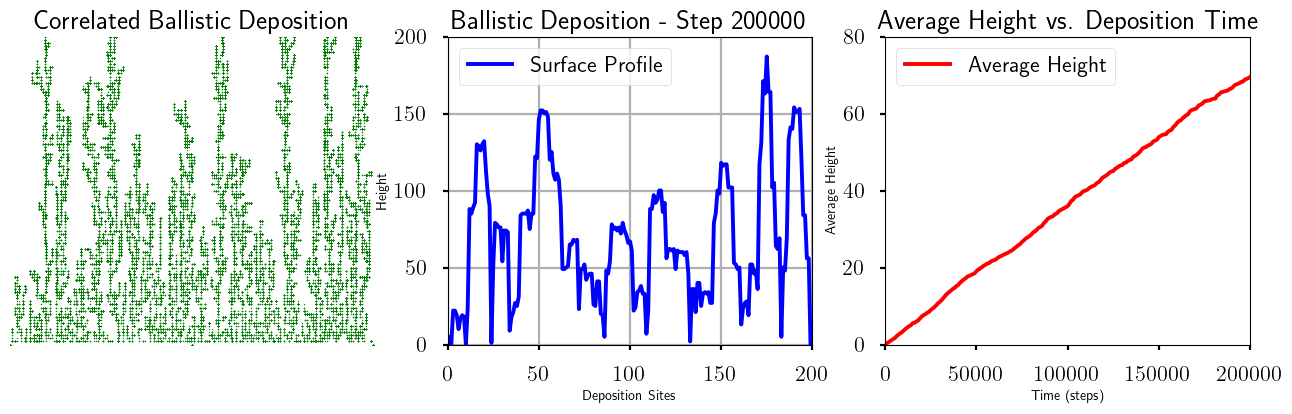

In [88]:
def ballistic_deposition(maxi=100000, npoints=200):
    hit = np.zeros(npoints)  # Array to track column heights
    avg_heights = []         # List to track average heights over time
    x_values, y_values = [],[]
    oldx, oldy = 100,0

    for i in range(1, maxi + 1):
        r = int(npoints * np.random.random())  # Random index
        x = r - oldx
        y = hit[r] - oldy
        dist = x * x + y * y

        if dist == 0:
            prob = 1.0
        else:
            prob = 9.0 / dist

        pp = np.random.random()

        if pp < prob:
            if r > 0 and r < npoints - 1:
                if hit[r] >= hit[r - 1] and hit[r] >= hit[r + 1]:
                    hit[r] += 1
                else:
                    hit[r] = max(hit[r - 1], hit[r + 1])
            oldx = r
            oldy = hit[r]

        olxc = oldx * 2 - 200
        olyc = oldy * 4 - 200
        x_values.append(olxc)
        y_values.append(olyc)
        avg_heights.append(np.mean(hit))

        if i % 1000 == 0 or i == maxi:
            fig, (ax1, ax2, ax3) = plt.subplots(1,3,figsize=(16, 4))
            ax1.plot(x_values, y_values, 'g.', ms=1.8, alpha=1)
            ax1.set_title('Correlated Ballistic Deposition')
            ax1.set_xlabel('x')
            ax1.set_ylabel('y')
            ax1.set_xlim(-200, 200)
            ax1.set_ylim(-200, 200)
            ax1.grid(False)
            ax1.axis(False)
            ax2.plot(range(npoints), hit, 'b-', label='Surface Profile')
            ax2.set_title(f'Ballistic Deposition - Step {i}')
            ax2.set_xlabel('Deposition Sites')
            ax2.set_xlim(0, 200)
            ax2.set_ylim(0, 200)
            ax2.set_ylabel('Height')
            ax2.grid(True)
            ax2.legend()
            ax3.plot(range(1000, i + 1, 1000), avg_heights[999::1000], color='red', label='Average Height')
            ax3.set_title('Average Height vs. Deposition Time')
            ax3.set_xlabel('Time (steps)')
            ax3.set_ylabel('Average Height')
            ax3.set_xlim(0, 200000)
            ax3.set_ylim(0, 80)
            ax3.legend()
            clear_output(wait=True)
            display(plt.gcf())
            plt.close()
    return hit, avg_heights

final_heights, avg_heights = ballistic_deposition(maxi=200000, npoints=200)